Carolyn White  
ABE 516X  
Dr. Adina Howe  
Fall 2021  

# Iowa State University - Uganda Program
# 2021 Water User Committee Project
#### ABE 516X Final Course Project

In [2]:
#General Imports
import pandas as pd
import numpy as np
from scipy import stats

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [3]:
#Load Data
raw_df = pd.read_excel('E:/ISU/Graduate/Courses/F21/ABE 516X/ISU-UP_RawData.xlsx')
print('DataFrame Shape:', raw_df.shape)
raw_df.head()

DataFrame Shape: (24, 39)


,Respondent,1,2,3,4,5,6_women,6_men,6_persons-with-disabilities,7.1,...,15,16,17,18,19,20.1,20.2,21,22,23
0,1410,Treasurer,I was chosen by the community members,I am able to get clean and safe water for home...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,3.0,3.0,0.0,Yes,...,monthly,insides pipes repair; piston repair; oiling of...,cylinder breakdown for one month,poor handling of the borehole; delayed greasing,b,yes,number of households; water user fee; committe...,jerrycan washings by every water user; hygiene...,misunderstandings of committee members; failur...,additional training by the organization about ...
1,1411,Guard,I volunteered to giver services to the community,cooperation from the community members; cooper...,6.0,guards(x2); vice chairperson; chairperson; sec...,4.0,2.0,0.0,yes,...,monthly,greasing of the movable parts; pipe replacemen...,none,mishandling by the water users; theft of some ...,b,yes,water user fee; number of households,no fetching water at night; cleaning/washing j...,lack of an appropriate model to the borehole; ...,routine management of water cistern at the bor...
2,1412,Treasurer,The community chose her because they trusted h...,because the community has trust on me,6.0,chairperson; treasurer; secretary; representat...,2.0,4.0,0.0,yes,...,NaN,NaN,NaN,poor pumping by children; banging on the handle,b,yes,water user fee; number of households; water us...,"washing jerrycans; time management, lining jer...",failure of community people to clean the boreh...,fencing of the borehole
3,1413,Chairperson,selected by community members because he is a ...,he was trained on how to manage the borehole s...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,1.0,yes,...,every 3 months,valve replacement; piston repair; chain repair...,NaN,poor handling of the boreholeby the children m...,b,yes,water user fees; number of households; expendi...,diffing and [slashing] around the borehole; fe...,disunity during [fee] collection; fetching wat...,provision of amendable fence by organization; ...
4,1414,Treasurer,Was elected by community member because there ...,because people are social and good to work wit...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,0.0,yes,...,monthly,chain greasing and replacement; pipes replacem...,handle breakdown in 2019 for one month,poor/bad pumping; delayed greasing; spoilage o...,b,yes,costs involved; parts repaired; date of mainte...,rountine cleaning of the borehole area; washin...,faulty padlocks; abuse by the community member...,we ask for more support from ISU-UP in case of...


In [4]:
#Desribe integers
raw_df.describe()

,Respondent,4,6_women,6_men,6_persons-with-disabilities,9.2
count,24.000000,23.000000,23.000000,23.000000,23.000000,22.000000
mean,1421.500000,6.130435,2.608696,3.391304,0.260870,87.045455
std,7.071068,0.814881,0.583027,0.656376,0.448978,30.376177
min,1410.000000,3.000000,2.000000,2.000000,0.000000,40.000000
25%,1415.750000,6.000000,2.000000,3.000000,0.000000,61.750000
50%,1421.500000,6.000000,3.000000,3.000000,0.000000,85.000000
75%,1427.250000,6.500000,3.000000,4.000000,0.500000,100.000000
max,1433.000000,7.000000,4.000000,5.000000,1.000000,150.000000


In [5]:
#Identifying data types
raw_df.dtypes

Respondent                       int64
1                               object
2                               object
3                               object
4                              float64
5                               object
6_women                        float64
6_men                          float64
6_persons-with-disabilities    float64
7.1                             object
7.2                             object
8                               object
9.1                             object
9.2                            float64
10.1                            object
10.2                            object
11                              object
12                              object
12.a.1                          object
12.a.2                          object
12.a.3                          object
12.a.4                          object
12.b.1                          object
12.b.2                          object
12.b.3                          object
12.b.4                   

*Data types Notes:* 
- survey responses are objects, even though many known to be numerical values
- remove '-' to be blank/missing in excel
- ranges are objects -> convert to values

In [6]:
#Description of data by question
raw_df.describe

<bound method NDFrame.describe of     Respondent                 1  \
0         1410         Treasurer   
1         1411             Guard   
2         1412         Treasurer   
3         1413       Chairperson   
4         1414         Treasurer   
5         1415       Chairperson   
6         1416  Vice chairperson   
7         1417       Chairperson   
8         1418               NaN   
9         1419       Chairperson   
10        1420             Guard   
11        1421         Secretary   
12        1422       Chairperson   
13        1423             Guard   
14        1424             Guard   
15        1425       Chairperson   
16        1426             Guard   
17        1427             Guard   
18        1428       Chairperson   
19        1429         Secretary   
20        1430       Chairperson   
21        1431       Chairperson   
22        1432       Chairperson   
23        1433         Secretary   

                                                    2  \
0       

In [7]:
#List of Columns
raw_df.columns

Index([                 'Respondent',                             1,
                                   2,                             3,
                                   4,                             5,
                           '6_women',                       '6_men',
       '6_persons-with-disabilities',                           7.1,
                                 7.2,                             8,
                                 9.1,                           9.2,
                                10.1,                          10.2,
                                  11,                            12,
                            '12.a.1',                      '12.a.2',
                            '12.a.3',                      '12.a.4',
                            '12.b.1',                      '12.b.2',
                            '12.b.3',                      '12.b.4',
                            '12.b.5',                            13,
                                  

In [8]:
#View of short answers (1)

#WUC Composition
print('Position', raw_df[1].unique())
print('#Members', raw_df[4].unique())
print('#Women', raw_df['6_women'].unique())
print('#Men', raw_df['6_men'].unique())
print('#PWD', raw_df['6_persons-with-disabilities'].unique())
print('Training?', raw_df[7.1].unique())
print('Mtg Freq', raw_df[8].unique())
print('List Users?', raw_df[9.1].unique())
print('#Households', raw_df[9.2].unique())

Position ['Treasurer' 'Guard' 'Chairperson' 'Vice chairperson' nan 'Secretary']
#Members [ 6.  7. nan  3.]
#Women [ 3.  4.  2. nan]
#Men [ 3.  2.  4. nan  5.]
#PWD [ 0.  1. nan]
Training? ['Yes' 'yes' nan]
Mtg Freq ['once a year' 'monthly' 'every 4 months' 'biannually' '3 times per year'
 '6 times per year' nan 'every 3 months' '4 times per year'
 'every 2 months']
List Users? ['Yes' 'yes' nan]
#Households [100.  70.  46.  nan  60.  75.  90.  40. 130.  67.  55. 150.  80. 120.]


*WUC Notes:*
- #PWD - none = 0
- Training - capt
- Mtg freg -> consistent metric
- List users - capt

In [9]:
#View of short answers (2)

#Financial Responsibilities
print('Banking?', raw_df[10.1].unique())
print('Desc', raw_df[10.2].unique())
print('Y $O&M', raw_df[11].unique())
print('Paymt', raw_df[12].unique())
print('Documentation', raw_df['12.a.1'].unique())
print('Source', raw_df['12.a.2'].unique())
print('Amt', raw_df['12.a.3'].unique())
print('Cover$', raw_df['12.a.4'].unique())
print('Fee', raw_df['12.b.1'].unique())
print('Collection', raw_df['12.b.2'].unique())
print('Documentation', raw_df['12.b.4'].unique())
print('Cover$', raw_df['12.b.5'].unique())

Banking? ['No' 'no' 'none' nan 'yes']
Desc [nan 'Iyeyunge Sacco' 'treasurer']
Y $O&M ['60000-70000' 100000 200000 nan 50000 220000 55000 70000 80000 300000
 250000 120000 '50000-100000']
Paymt ['c' nan 'C']
Documentation ['Yes' 'yes' nan 'no']
Source ['ISU-UP; Office of Speaker; District Water Office'
 'ISU-UP; District water office'
 'school head teachers; ISU-UP; District water office' nan
 'District water office']
Amt [100000 '40000-200000' '60000-120000' '100000-120000' '50000-100000'
 '40000-100000' '60000-150000' nan '100000-200000' '60000-70000'
 '100000-150000' 'none' '50-100000' 90000]
Cover$ ['Yes' 'yes' nan 'no' 'none']
Fee ['5000 per household per year' '500 per household per year'
 '500 per household per month' '6000 per household per year'
 '5000 per household' nan]
Collection ['weekly' 'monthly' 'annually' 'yearly' nan]
Documentation ['yes' nan]
Cover$ ['yes' nan]


*Financial Notes:*
- Banking - none, capt
- Desc only relevant for Banking - yes
- O&M Y - need avg of ranges
- Paymt - capt
- Documentation - capt
- Amt - max, min, avg for range
- Cover - capt
- Fee - consistency
- Collection - value for calc

In [10]:
#View of short answers (3)

#Monitoring and Operation
print('Monitoring', raw_df[13].unique())
print('Mon Freq', raw_df[14].unique())
print('Service Freq', raw_df[15].unique())
print('Repair', raw_df[19].unique())
print('Documentation', raw_df[20.1].unique())

Monitoring ['yes; c' 'yes; a; b' 'yes' 'yes; b; c' 'yes; b' nan 'yes; a; c']
Mon Freq ['weekly' nan 'every 2 months' 'monthly' 'biweekly' 'daily']
Service Freq ['monthly' nan 'every 3 months' 'every 2 months']
Repair ['b' 'a' nan]
Documentation ['yes' nan]


*O&M Notes:*
* Monitoring - const
* Mon Freq - const
* Service freq - const

In [11]:
#Missing Values per row
raw_df.isnull().sum(axis=1)

0      1
1      1
2      5
3      2
4      7
5      1
6      2
7      1
8     38
9      1
10     1
11     1
12     1
13     1
14     1
15     2
16     1
17     9
18     1
19     1
20     1
21     1
22     1
23     0
dtype: int64

*Missing Values (row) Notes:*
* delete Row 8 because all missing values

In [12]:
#Missing Values per column
raw_df.isnull().sum(axis=0)

Respondent                      0
1                               1
2                               1
3                               1
4                               1
5                               1
6_women                         1
6_men                           1
6_persons-with-disabilities     1
7.1                             1
7.2                             1
8                               1
9.1                             2
9.2                             2
10.1                            2
10.2                           22
11                              2
12                              1
12.a.1                          5
12.a.2                          2
12.a.3                          1
12.a.4                          1
12.b.1                          1
12.b.2                          1
12.b.3                          1
12.b.4                          1
12.b.5                          1
13                              1
14                              3
15            

*Missing Values (col) Notes:*
* 10.2 most missing values are N/A where question not applicable due to previous answer (can remove 10.2 from most analysis)
* 10.1 missing values can be assumed no
* try replacing 11 with avg value (full page of 1414 was missing)
* 12.a.1 missing can be assumed no -> checked against questions 12.a.3 20.2 (might have to use ML for this one)
* 14, 15, 16, 18 cannot replace
* 17 assume none (asks if there was a breakdown)
* 19 assume b due to frequency, 20.1 assume yes (a full page of 1427 survey was missing leading to no gathered information)

## Wrangling/Cleaning Tasks Required:
1) remove row 8; temporarily hide column 10.2  
2) fill in missing values with assumptions; none = 0 for numerical col  
3) clean capitalization  
4) adjust time measurements to numerical values

In [13]:
#Task 1 - Drop row/columns

#Drop row 8 and columns Respondent, 10.2; reindex
data_df = raw_df.drop(index=8, columns=['Respondent'])
data_df = data_df.reset_index(drop=True)
data_df

data_df = data_df.drop(columns=[10.2])
data = data_df.copy()
data

,1,2,3,4,5,6_women,6_men,6_persons-with-disabilities,7.1,7.2,...,15,16,17,18,19,20.1,20.2,21,22,23
0,Treasurer,I was chosen by the community members,I am able to get clean and safe water for home...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,3.0,3.0,0.0,Yes,Borehole operations and maintenance,...,monthly,insides pipes repair; piston repair; oiling of...,cylinder breakdown for one month,poor handling of the borehole; delayed greasing,b,yes,number of households; water user fee; committe...,jerrycan washings by every water user; hygiene...,misunderstandings of committee members; failur...,additional training by the organization about ...
1,Guard,I volunteered to giver services to the community,cooperation from the community members; cooper...,6.0,guards(x2); vice chairperson; chairperson; sec...,4.0,2.0,0.0,yes,Borehole operations and maintenance,...,monthly,greasing of the movable parts; pipe replacemen...,none,mishandling by the water users; theft of some ...,b,yes,water user fee; number of households,no fetching water at night; cleaning/washing j...,lack of an appropriate model to the borehole; ...,routine management of water cistern at the bor...
2,Treasurer,The community chose her because they trusted h...,because the community has trust on me,6.0,chairperson; treasurer; secretary; representat...,2.0,4.0,0.0,yes,leadership trainings; borehole operation and m...,...,NaN,NaN,NaN,poor pumping by children; banging on the handle,b,yes,water user fee; number of households; water us...,"washing jerrycans; time management, lining jer...",failure of community people to clean the boreh...,fencing of the borehole
3,Chairperson,selected by community members because he is a ...,he was trained on how to manage the borehole s...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,1.0,yes,leadership trainings; borehole operation and m...,...,every 3 months,valve replacement; piston repair; chain repair...,NaN,poor handling of the boreholeby the children m...,b,yes,water user fees; number of households; expendi...,diffing and [slashing] around the borehole; fe...,disunity during [fee] collection; fetching wat...,provision of amendable fence by organization; ...
4,Treasurer,Was elected by community member because there ...,because people are social and good to work wit...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,0.0,yes,sanitation training; leadership training,...,monthly,chain greasing and replacement; pipes replacem...,handle breakdown in 2019 for one month,poor/bad pumping; delayed greasing; spoilage o...,b,yes,costs involved; parts repaired; date of mainte...,rountine cleaning of the borehole area; washin...,faulty padlocks; abuse by the community member...,we ask for more support from ISU-UP in case of...
5,Chairperson,elected by the community members; willingness ...,good attitude of the people; good performance;...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,3.0,3.0,0.0,yes,training about informing WUC members about the...,...,monthly,values repair; cylinder repair; pipes replacem...,cylinder breadown in 2018 for 2 weeks,bad pumping especially by children; poor repai...,a,yes,costs involved in operation and maintenance; d...,contribution of money; cleaning of the borehol...,no challenges so far,She thanks ISU-UP for providing a borehole in ...
6,Vice chairperson,I wanted to ensure that safe and clean water i...,cooperation between him and the community members,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,0.0,yes,training about proper handling of the borehole...,...,every 2 months,pipes getting broken; cylinder repair,cylinder breakdown for 3 weeks,poor handling of the borehole by community mem...,b,yes,number of households; water user fee; committe...,cleaning of jerrycans; time management,disunity of members during fees collection; pa...,support from ISU-UP and other organizations du...
7,Chairperson,wanted to serve as a chairperson; elected bu t...,cooperativeness o

In [14]:
#Task 2 - Deal with assumptions

#10.1: none, nan = no
#11: nan, range = avg value
#12.a.1: nan = no
#12.a.3: range = avg; none = 0
#17: nan = none
#19: nan = b
#20.1: nan = yes

#10.1
data.iloc[2, 13] = 'no'
#11
data.iloc[0, 14] = 65000
data.iloc[18,14] = 75000
data[11].fillna(data[11].mean())
#12.a.1
data['12.a.1'].fillna('no')
#12.a.3
data.iloc[1, 18] = 120000
data.iloc[3, 18] = 90000
data.iloc[4, 18] = 110000
data.iloc[5, 18] = 75000
data.iloc[6, 18] = 70000
data.iloc[7, 18] = 105000
data.iloc[9, 18] = 150000
data.iloc[10, 18] = 105000
data.iloc[11, 18] = 65000
data.iloc[12, 18] = 125000
data.iloc[13, 18] = 75000
data.iloc[15, 18] = 75000
#data['12.a.3'].replace(to_replace='none', value=0)
for r in range (23):
    if data.iloc[r, 18] == 'none':
        data.iloc[r, 18] = 0
#12.a.4
for r in range (23):
    if data.iloc[r, 19] == 'none':
        data.iloc[r, 19] = 'no'
#17
data[17].fillna('none')
#19
data[19].fillna('b')
#20.1
data[20.1].fillna('yes')

data

,1,2,3,4,5,6_women,6_men,6_persons-with-disabilities,7.1,7.2,...,15,16,17,18,19,20.1,20.2,21,22,23
0,Treasurer,I was chosen by the community members,I am able to get clean and safe water for home...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,3.0,3.0,0.0,Yes,Borehole operations and maintenance,...,monthly,insides pipes repair; piston repair; oiling of...,cylinder breakdown for one month,poor handling of the borehole; delayed greasing,b,yes,number of households; water user fee; committe...,jerrycan washings by every water user; hygiene...,misunderstandings of committee members; failur...,additional training by the organization about ...
1,Guard,I volunteered to giver services to the community,cooperation from the community members; cooper...,6.0,guards(x2); vice chairperson; chairperson; sec...,4.0,2.0,0.0,yes,Borehole operations and maintenance,...,monthly,greasing of the movable parts; pipe replacemen...,none,mishandling by the water users; theft of some ...,b,yes,water user fee; number of households,no fetching water at night; cleaning/washing j...,lack of an appropriate model to the borehole; ...,routine management of water cistern at the bor...
2,Treasurer,The community chose her because they trusted h...,because the community has trust on me,6.0,chairperson; treasurer; secretary; representat...,2.0,4.0,0.0,yes,leadership trainings; borehole operation and m...,...,NaN,NaN,NaN,poor pumping by children; banging on the handle,b,yes,water user fee; number of households; water us...,"washing jerrycans; time management, lining jer...",failure of community people to clean the boreh...,fencing of the borehole
3,Chairperson,selected by community members because he is a ...,he was trained on how to manage the borehole s...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,1.0,yes,leadership trainings; borehole operation and m...,...,every 3 months,valve replacement; piston repair; chain repair...,NaN,poor handling of the boreholeby the children m...,b,yes,water user fees; number of households; expendi...,diffing and [slashing] around the borehole; fe...,disunity during [fee] collection; fetching wat...,provision of amendable fence by organization; ...
4,Treasurer,Was elected by community member because there ...,because people are social and good to work wit...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,0.0,yes,sanitation training; leadership training,...,monthly,chain greasing and replacement; pipes replacem...,handle breakdown in 2019 for one month,poor/bad pumping; delayed greasing; spoilage o...,b,yes,costs involved; parts repaired; date of mainte...,rountine cleaning of the borehole area; washin...,faulty padlocks; abuse by the community member...,we ask for more support from ISU-UP in case of...
5,Chairperson,elected by the community members; willingness ...,good attitude of the people; good performance;...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,3.0,3.0,0.0,yes,training about informing WUC members about the...,...,monthly,values repair; cylinder repair; pipes replacem...,cylinder breadown in 2018 for 2 weeks,bad pumping especially by children; poor repai...,a,yes,costs involved in operation and maintenance; d...,contribution of money; cleaning of the borehol...,no challenges so far,She thanks ISU-UP for providing a borehole in ...
6,Vice chairperson,I wanted to ensure that safe and clean water i...,cooperation between him and the community members,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,0.0,yes,training about proper handling of the borehole...,...,every 2 months,pipes getting broken; cylinder repair,cylinder breakdown for 3 weeks,poor handling of the borehole by community mem...,b,yes,number of households; water user fee; committe...,cleaning of jerrycans; time management,disunity of members during fees collection; pa...,support from ISU-UP and other organizations du...
7,Chairperson,wanted to serve as a chairperson; elected bu t...,cooperativeness o

In [15]:
#Task 3 - Remove all capitalized letters

print(data[7.1].unique())
#data.iloc[1, 0].type
#type(data.iloc[1, 0])

wordcol = [1, 2, 3, 5, 7.1, 7.2, 9.1, 10.1, 12, '12.a.4', '12.b.1', '12.b.2', '12.b.3', '12.b.4', '12.b.5', 13, 14, 15, 16, 17, 18, 19, 21, 22, 23]

for c in wordcol:
    #print(data[c].dtype)
    data[c] = data[c].str.lower()

data

['Yes' 'yes']


,1,2,3,4,5,6_women,6_men,6_persons-with-disabilities,7.1,7.2,...,15,16,17,18,19,20.1,20.2,21,22,23
0,treasurer,i was chosen by the community members,i am able to get clean and safe water for home...,6.0,chairperson; vice chairperson; treasurer; secr...,3.0,3.0,0.0,yes,borehole operations and maintenance,...,monthly,insides pipes repair; piston repair; oiling of...,cylinder breakdown for one month,poor handling of the borehole; delayed greasing,b,yes,number of households; water user fee; committe...,jerrycan washings by every water user; hygiene...,misunderstandings of committee members; failur...,additional training by the organization about ...
1,guard,i volunteered to giver services to the community,cooperation from the community members; cooper...,6.0,guards(x2); vice chairperson; chairperson; sec...,4.0,2.0,0.0,yes,borehole operations and maintenance,...,monthly,greasing of the movable parts; pipe replacemen...,none,mishandling by the water users; theft of some ...,b,yes,water user fee; number of households,no fetching water at night; cleaning/washing j...,lack of an appropriate model to the borehole; ...,routine management of water cistern at the bor...
2,treasurer,the community chose her because they trusted h...,because the community has trust on me,6.0,chairperson; treasurer; secretary; representat...,2.0,4.0,0.0,yes,leadership trainings; borehole operation and m...,...,NaN,NaN,NaN,poor pumping by children; banging on the handle,b,yes,water user fee; number of households; water us...,"washing jerrycans; time management, lining jer...",failure of community people to clean the boreh...,fencing of the borehole
3,chairperson,selected by community members because he is a ...,he was trained on how to manage the borehole s...,6.0,chairperson; vice chairperson; treasurer; secr...,2.0,4.0,1.0,yes,leadership trainings; borehole operation and m...,...,every 3 months,valve replacement; piston repair; chain repair...,NaN,poor handling of the boreholeby the children m...,b,yes,water user fees; number of households; expendi...,diffing and [slashing] around the borehole; fe...,disunity during [fee] collection; fetching wat...,provision of amendable fence by organization; ...
4,treasurer,was elected by community member because there ...,because people are social and good to work wit...,6.0,chairperson; vice chairperson; treasurer; secr...,2.0,4.0,0.0,yes,sanitation training; leadership training,...,monthly,chain greasing and replacement; pipes replacem...,handle breakdown in 2019 for one month,poor/bad pumping; delayed greasing; spoilage o...,b,yes,costs involved; parts repaired; date of mainte...,rountine cleaning of the borehole area; washin...,faulty padlocks; abuse by the community member...,we ask for more support from isu-up in case of...
5,chairperson,elected by the community members; willingness ...,good attitude of the people; good performance;...,6.0,chairperson; vice chairperson; treasurer; secr...,3.0,3.0,0.0,yes,training about informing wuc members about the...,...,monthly,values repair; cylinder repair; pipes replacem...,cylinder breadown in 2018 for 2 weeks,bad pumping especially by children; poor repai...,a,yes,costs involved in operation and maintenance; d...,contribution of money; cleaning of the borehol...,no challenges so far,she thanks isu-up for providing a borehole in ...
6,vice chairperson,i wanted to ensure that safe and clean water i...,cooperation between him and the community members,6.0,chairperson; vice chairperson; treasurer; secr...,2.0,4.0,0.0,yes,training about proper handling of the borehole...,...,every 2 months,pipes getting broken; cylinder repair,cylinder breakdown for 3 weeks,poor handling of the borehole by community mem...,b,yes,number of households; water user fee; committe...,cleaning of jerrycans; time management,disunity of members during fees collection; pa...,support from isu-up and other organizations du...
7,chairperson,wanted to serve as a chairperson; elected bu t...,cooperativeness o

In [16]:
#Verify lowercase against (yes, Yes)
print(data[7.1].unique())
print(data['12.a.4'].unique())

['yes']
['yes' 'no']


In [18]:
#Task 4 - Adjust time to numerical values (p1)

#8 -> x times per year
#12.b.2 -> do x times per year (e.x. monthly = 12, weekly = 52, annually = 1)
#14 -> x times per year
#15 -> x times per year

timecol = [10, 21, 26, 27]

for r in range (23):
    for c in timecol:
        if data.iloc[r, c] == 'once a year' or data.iloc[r, c] == 'yearly' or data.iloc[r, c] == 'annually':
            data.iloc[r, c] = 1
        if data.iloc[r, c] == 'biannually':
            data.iloc[r, c] = 2
        if data.iloc[r, c] == '3 times per year' or data.iloc[r, c] == 'every 4 months':
            data.iloc[r, c] = 3
        if data.iloc[r, c] == '4 times per year' or data.iloc[r, c] == 'every 3 months':
            data.iloc[r, c] = 4
        if data.iloc[r, c] == '6 times per year' or data.iloc[r, c] == 'every 2 months':
            data.iloc[r, c] = 6
        if data.iloc[r, c] == 'monthly':
            data.iloc[r, c] = 12
        if data.iloc[r, c] == 'biweekly':
            data.iloc[r, c] = 26
        if data.iloc[r, c] == 'weekly':
            data.iloc[r, c] = 52
        if data.iloc[r, c] == 'daily':
            data.iloc[r, c] = 365

print(data[8])
print(data['12.b.2'])
print(data[14])
print(data[15])

0      1
1     12
2     12
3      3
4      2
5      3
6      3
7      6
8      4
9     12
10    12
11     4
12    12
13    12
14     6
15    12
16    12
17     4
18     4
19     2
20     6
21     2
22     2
Name: 8, dtype: object
0     52
1     12
2     12
3      1
4      1
5      1
6      1
7     12
8      1
9      1
10    12
11     1
12     1
13    12
14     1
15    12
16    12
17    12
18     1
19    12
20     1
21    12
22     1
Name: 12.b.2, dtype: object
0      52
1      52
2     NaN
3      52
4       6
5      12
6      26
7      12
8      12
9      52
10     52
11     52
12     52
13     12
14     12
15     52
16    NaN
17     52
18     52
19    365
20     12
21     52
22    365
Name: 14, dtype: object
0      12
1      12
2     NaN
3       4
4      12
5      12
6       6
7      12
8       4
9      12
10      4
11     12
12     12
13     12
14      4
15      4
16    NaN
17      4
18      4
19      6
20      6
21     12
22      4
Name: 15, dtype: object


In [19]:
#Task 4 - Adjust time to numerical values (p2)

#12.b.1 -> do amount per household per year
data['12.b.1']

#assume row 1 should be 5000 per household per year
#assume row 6 should be 5000 per hoursehold per year

data.iloc[1, 20] = '5000 per household per year'
data.iloc[6, 20] = '5000 per household per year'

for r in range(23):
    if data.iloc[r, 20][-5:] == 'month':
        data['12.b.1'] = data['12.b.1'].str.slice(0, 3)
    else:
        data['12.b.1'] = data['12.b.1'].str.slice(0, 4)

data['12.b.1']

0     5000
1     5000
2     500 
3     5000
4     6000
5     5000
6     5000
7     500 
8     6000
9     5000
10    500 
11    5000
12    6000
13    500 
14    6000
15    500 
16    500 
17    500 
18    6000
19    500 
20    6000
21    500 
22    6000
Name: 12.b.1, dtype: object

In [21]:
#Task 4 - Adjust time to numerical values (p3)
#Convert to integers from string
data[[4, '6_women', '6_men', '6_persons-with-disabilities', 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]]
data[[4, '6_women', '6_men', '6_persons-with-disabilities', 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]] = data[[4, '6_women', '6_men', '6_persons-with-disabilities', 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]].apply(pd.to_numeric)
data.dtypes

1                               object
2                               object
3                               object
4                              float64
5                               object
6_women                        float64
6_men                          float64
6_persons-with-disabilities    float64
7.1                             object
7.2                             object
8                               object
9.1                             object
9.2                            float64
10.1                            object
11                             float64
12                              object
12.a.1                          object
12.a.2                          object
12.a.3                           int64
12.a.4                          object
12.b.1                           int64
12.b.2                           int64
12.b.3                          object
12.b.4                          object
12.b.5                          object
13                       

In [23]:
#Task 4 - Adjust time to numerical values (p4)

#Now get 12.b.1 into value per year (all the fees/month are less than 5000, so can isolate those and multiple by 12 months)

for r in range(23):
    if data.iloc[r, 20] <= 4999:
        data.iloc[r, 20] = (data.iloc[r, 20]) * 12

data['12.b.1']

0     5000
1     5000
2     6000
3     5000
4     6000
5     5000
6     5000
7     6000
8     6000
9     5000
10    6000
11    5000
12    6000
13    6000
14    6000
15    6000
16    6000
17    6000
18    6000
19    6000
20    6000
21    6000
22    6000
Name: 12.b.1, dtype: int64

##### End of Data Wrangling

## Descriptors & Visualization of (simple answer) Data
#### Statistics & Machine Learning Review
1) Numerical Values (overview)  
2) WUC Gender Composition (Gender Ratio)  
3) Respondent Position  
4) Training & Meeting Frequency  
5) Household overview  
6) Banking system  
7) Donations  
8) Fees & Collection  
9) O&M Cost; Monitoring; Repair  
10) Documentation(s)

In [24]:
#Task 1 - Numerical Values Overview

data.describe()

,4,6_women,6_men,6_persons-with-disabilities,9.2,11,12.a.3,12.b.1,12.b.2,14,15
count,23.000000,23.000000,23.000000,23.000000,22.000000,22.000000,23.000000,23.000000,23.000000,21.000000,21.000000
mean,6.130435,2.608696,3.391304,0.260870,87.045455,147954.545455,71956.521739,5695.652174,8.000000,66.952381,8.095238
std,0.814881,0.583027,0.656376,0.448978,30.376177,80262.353906,47571.456550,470.471969,11.045361,100.904646,3.871754
min,3.000000,2.000000,2.000000,0.000000,40.000000,50000.000000,0.000000,5000.000000,1.000000,6.000000,4.000000
25%,6.000000,2.000000,3.000000,0.000000,61.750000,76250.000000,32500.000000,5000.000000,1.000000,12.000000,4.000000
50%,6.000000,3.000000,3.000000,0.000000,85.000000,110000.000000,90000.000000,6000.000000,1.000000,52.000000,6.000000
75%,6.500000,3.000000,4.000000,0.500000,100.000000,200000.000000,102500.000000,6000.000000,12.000000,52.000000,12.000000
max,7.000000,4.000000,5.000000,1.000000,150.000000,300000.000000,150000.000000,6000.000000,52.000000,365.000000,12.000000


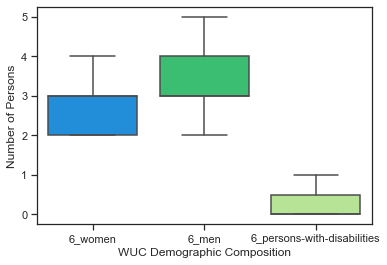

In [25]:
#Task 2 - WUC Gender Composition (p1)

data_dem = data[['6_women', '6_men', '6_persons-with-disabilities']]
data_dem

sns.set_theme(palette='terrain', style='ticks')
sns.boxplot(data=data_dem).set(xlabel='WUC Demographic Composition', ylabel='Number of Persons');

In [27]:
#Task 2 - WUC Gender Composition (p2)

data_dem['Req Met'] = 'yes/no'

for r in range (23):
    if data_dem.iloc[r, 0] >= data_dem.iloc[r, 1]:
        data_dem.iloc[r, 3] = 'yes'
    else:
        data_dem.iloc[r, 3] = 'no'

data_dem

<ipython-input-27-c004eab56de3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dem['Req Met'] = 'yes/no'
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,6_women,6_men,6_persons-with-disabilities,Req Met
0,3.0,3.0,0.0,yes
1,4.0,2.0,0.0,yes
2,2.0,4.0,0.0,no
3,2.0,4.0,1.0,no
4,2.0,4.0,0.0,no
5,3.0,3.0,0.0,yes
6,2.0,4.0,0.0,no
7,2.0,4.0,1.0,no
8,3.0,3.0,0.0,yes
9,2.0,3.0,1.0,no


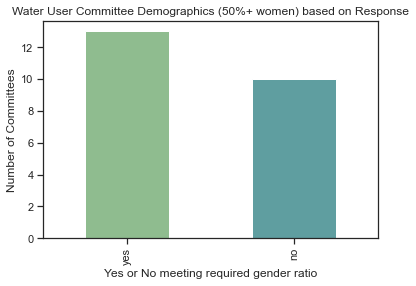

In [28]:
#Task 2 - WUC Gender Composition (p3)

gender_count = pd.value_counts(data_dem['Req Met'], sort=True)

#Bar Chart
gender_count.plot(kind='bar', color=['darkseagreen', 'cadetblue'])
plt.title('Water User Committee Demographics (50%+ women) based on Response')
plt.ylabel('Number of Committees')
plt.xlabel('Yes or No meeting required gender ratio');

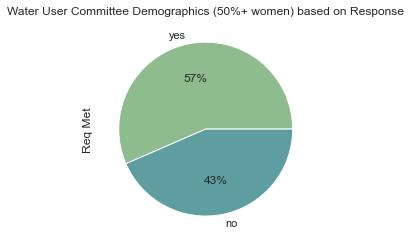

In [29]:
#Task 2 - WUC Gender Composition (p3)

#Pie Chart
gender_count.plot(kind='pie', autopct='%1.0f%%', colors=['darkseagreen', 'cadetblue'])
plt.title('Water User Committee Demographics (50%+ women) based on Response');

In [30]:
#Task 2 - WUC Gender Composition (p4)

#Review of Naive Bayes Classification (p1)

#X-Variables
X_dem = data_dem[['6_women', '6_men']]
print(X_dem.shape)

#Categories
data_dem['Req_num'] = data_dem['Req Met'].map({'yes':1, 'no':0})
y_dem = data_dem['Req_num']
print(y_dem.shape)

#Import split and NB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#Training & Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_dem, y_dem)
print('X Train Shape:', X_train.shape)
print('y Train Shape:', y_train.shape)

#Training
gnb = GaussianNB()
train = gnb.fit(X_train, y_train)

#Testing
y_pred = train.predict(X_test)
print(y_pred)

print('X Test Shape:', X_test.shape)
print('y Test Shape:', y_test.shape)

#New DataFrame
test = pd.DataFrame(X_test)
test['Req Met'] = y_pred
test.head(5)

(23, 2)
(23,)


<ipython-input-30-1748935b6acd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dem['Req_num'] = data_dem['Req Met'].map({'yes':1, 'no':0})


X Train Shape: (17, 2)
y Train Shape: (17,)
[1 1 1 0 0 1]
X Test Shape: (6, 2)
y Test Shape: (6,)


,6_women,6_men,Req Met
8,3.0,3.0,1
12,3.0,3.0,1
5,3.0,3.0,1
16,2.0,4.0,0
9,2.0,3.0,0


1.0
     No  Yes
No    2    0
Yes   0    4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



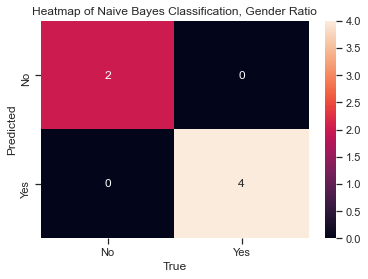

In [31]:
#Task 2 - WUC Gender Composition (p5)

#Review of Naive Bayes Classification (p2)

#Checking Accuracy
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(cmdf)

print(classification_report(y_pred, y_test))

sns.heatmap(cm, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Heatmap of Naive Bayes Classification, Gender Ratio')
plt.xlabel('True')
plt.ylabel('Predicted');

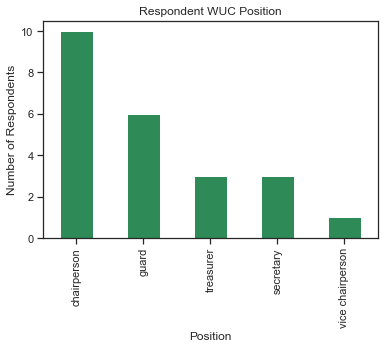

In [32]:
#Task 3 - Respondent Position

data_pos = data[1].value_counts()
data_pos
pos_count = pd.value_counts(data[1], sort=True)
pos_count.plot(kind='bar', color='seagreen')
plt.title('Respondent WUC Position')
plt.xlabel('Position')
plt.ylabel('Number of Respondents');

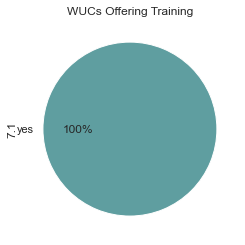

In [33]:
#Task 4 - Training & Meeting Frequency (p1)

#Is WUC Member training provided?
training = pd.value_counts(data[7.1], sort=True)
training.plot(kind='pie', autopct='%1.0f%%', colors=['cadetblue'])
plt.title('WUCs Offering Training');

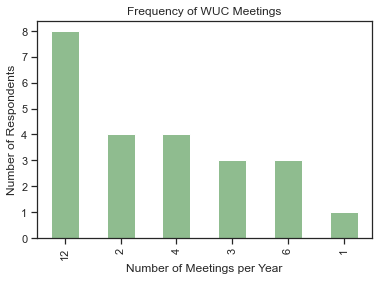

In [34]:
#Task 4 - Training & Meeting Frequency (p2)

#How often are WUC meetings (times per year)?
meet_f = pd.value_counts(data[8])
meet_f.plot(kind='bar', color='darkseagreen')
plt.title('Frequency of WUC Meetings')
plt.xlabel('Number of Meetings per Year')
plt.ylabel('Number of Respondents');

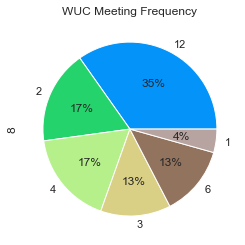

In [35]:
#Task 4 - Training & Meeting Frequency (p3)

#Pie Chart of WUC Meeting
meet_f.plot(kind='pie', autopct='%1.0f%%')
plt.title('WUC Meeting Frequency');

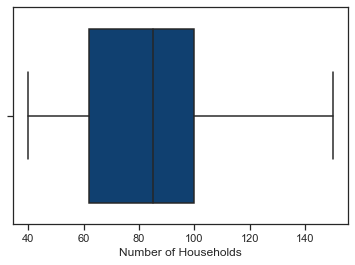

In [36]:
#Task 5 - Household Overview (p1)

#Boxplot (shows range)
users = data[9.2]
sns.boxplot(x=users, palette='ocean').set(xlabel='Number of Households');

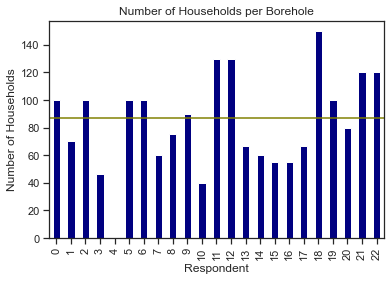

In [37]:
#Task 5 - Household Overview (p2)

#Bar Graph (exposes missing data, shows variation)
users.plot(kind='bar', color='navy')
plt.hlines(y=87, xmin=-1, xmax=23, color='olive')
plt.title('Number of Households per Borehole')
plt.xlabel('Respondent')
plt.ylabel('Number of Households');

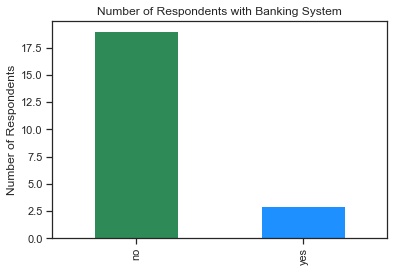

In [38]:
#Task 6 - Banking (p1)

bank_count = pd.value_counts(data[10.1])

#Bar Graph
bank_count.plot(kind='bar', color=['seagreen', 'dodgerblue'])
plt.title('Number of Respondents with Banking System')
plt.ylabel('Number of Respondents');

#I don't think this question was well written or understood by the respondents

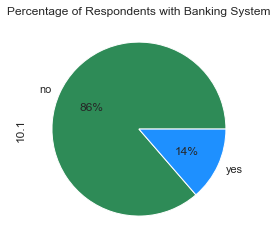

In [39]:
#Task 6 - Banking (p2)

#Pie Chart
bank_count.plot(kind='pie', autopct='%1.0f%%', colors=['seagreen', 'dodgerblue'])
plt.title('Percentage of Respondents with Banking System');

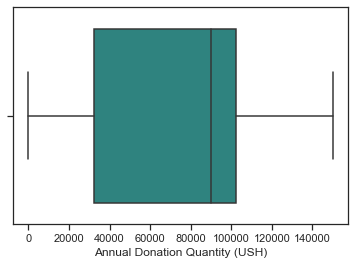

In [40]:
#Task 7 - Donations (p1)

#How much in donations do you recieve annually (12.a.3)
#Do these funds adequately pay for necessary costs (12.a.4)

#Boxplot (range)
donations = data['12.a.3']
sns.boxplot(x=donations, palette='viridis').set(xlabel='Annual Donation Quantity (USH)');

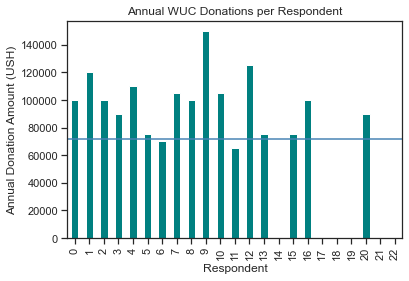

In [41]:
#Task 7 - Donations (p2)

#Bar Graph (show individual respondents)
donations.plot(kind='bar', color='teal')
plt.hlines(y=72000, xmin=-1, xmax=23, color='steelblue')
plt.title('Annual WUC Donations per Respondent')
plt.xlabel('Respondent')
plt.ylabel('Annual Donation Amount (USH)');

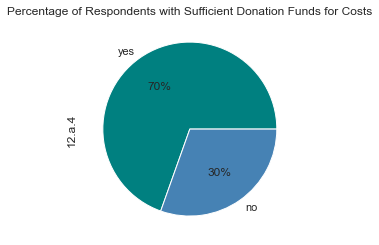

In [42]:
#Task 7 - Donation (p3)

donation_count = pd.value_counts(data['12.a.4'])
donation_count.plot(kind='pie', autopct='%1.0f%%', colors=['teal', 'steelblue'])
plt.title('Percentage of Respondents with Sufficient Donation Funds for Costs');

#this question was also poorly worded

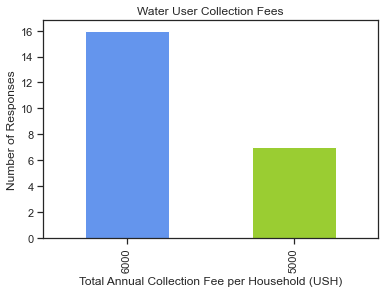

In [43]:
#Task 8 - Fees & Collection (p1)

#Fee Counts
data_fees = data['12.b.1'].value_counts()
data_fees
fees_count = pd.value_counts(data['12.b.1'])

#Bar Graph - Fees
fees_count.plot(kind='bar', color=['cornflowerblue', 'yellowgreen'])
plt.title('Water User Collection Fees')
plt.xlabel('Total Annual Collection Fee per Household (USH)')
plt.ylabel('Number of Responses');

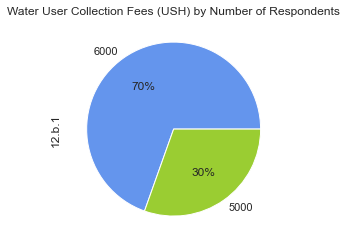

In [44]:
#Task 8 - Fees & Collection (p2)

#Pie Chart - Fees
fees_count.plot(kind='pie', autopct='%1.0f%%', colors=['cornflowerblue', 'yellowgreen'])
plt.title('Water User Collection Fees (USH) by Number of Respondents');

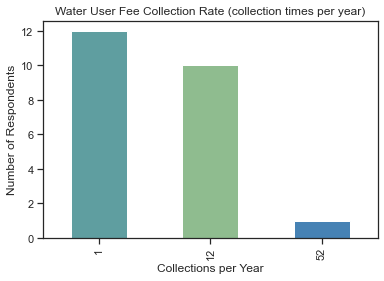

In [45]:
#Task 8 - Fees & Collection (p3)

#Collection Rate
collection_count = pd.value_counts(data['12.b.2'])

#Bar Graph - Collection Rates
collection_count.plot(kind='bar', color=['cadetblue', 'darkseagreen', 'steelblue'])
plt.xticks(rotation=90)
plt.title('Water User Fee Collection Rate (collection times per year)')
plt.xlabel('Collections per Year')
plt.ylabel('Number of Respondents');

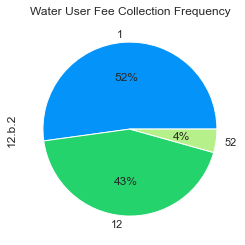

In [46]:
#Task 8 - Fees & Collection (p4)

#Pie Chart - Collection Frequency
collection_count.plot(kind='pie', autopct='%1.0f%%')
plt.title('Water User Fee Collection Frequency');

In [48]:
#Task 8 - Fees & Collection (p5)

#Annual WUC Income by fee & household, donations (p1)
finances = data.copy()
finances = finances[[11, '12.a.3', 9.2, '12.b.1']]
finances['Fee Income'] = finances[9.2] * finances['12.b.1']
finances['Total Income'] = finances['12.a.3'] + finances['Fee Income']
finances['Sufficient Funds'] = 'yes/no'

for r in range(23):
    if finances.iloc[r, 4] >= finances.iloc[r, 0]:
        finances.iloc[r, 6] = 'yes'
    else:
        finances.iloc[r, 6] = 'no'
        
finances

,11,12.a.3,9.2,12.b.1,Fee Income,Total Income,Sufficient Funds
0,65000.0,100000,100.0,5000,500000.0,600000.0,yes
1,100000.0,120000,70.0,5000,350000.0,470000.0,yes
2,100000.0,100000,100.0,6000,600000.0,700000.0,yes
3,200000.0,90000,46.0,5000,230000.0,320000.0,yes
4,NaN,110000,NaN,6000,NaN,NaN,no
5,50000.0,75000,100.0,5000,500000.0,575000.0,yes
6,220000.0,70000,100.0,5000,500000.0,570000.0,yes
7,200000.0,105000,60.0,6000,360000.0,465000.0,yes
8,55000.0,100000,75.0,6000,450000.0,550000.0,yes
9,70000.0,150000,90.0,5000,450000.0,600000.0,yes


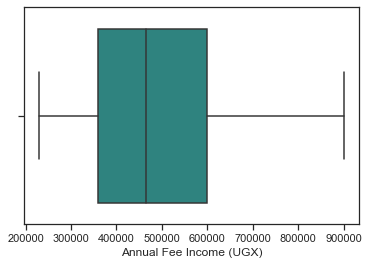

In [49]:
#Task 8 - Fees & Collection (p6)

#Annual WUC Income by fee & household, donations (p2)
#Boxplot (Total Fee Income)
fee_income = finances['Fee Income']
sns.boxplot(x=fee_income, palette='viridis').set(xlabel='Annual Fee Income (UGX)');

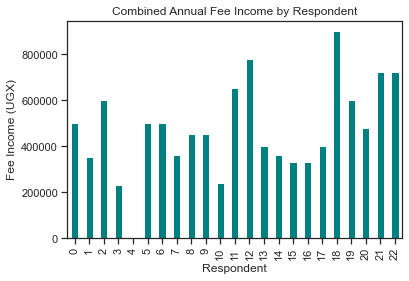

In [50]:
#Task 8 - Fees & Collection (p7)

#Annual WUC Income by fee & household, donations (p3)
#Bar Graph (Total Fee Income)
finances['Fee Income'].plot(kind='bar', color='teal')
plt.title('Combined Annual Fee Income by Respondent')
plt.xlabel('Respondent')
plt.ylabel('Fee Income (UGX)');

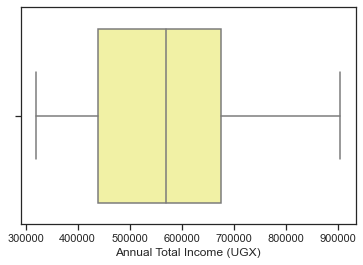

In [51]:
#Task 8 - Fees & Collection (p8)

#Annual WUC Income by fee & household, donations (p4)
#Boxplot (Total Annual Income)
total_income = finances['Total Income']
sns.boxplot(x=total_income, palette='terrain').set(xlabel='Annual Total Income (UGX)');

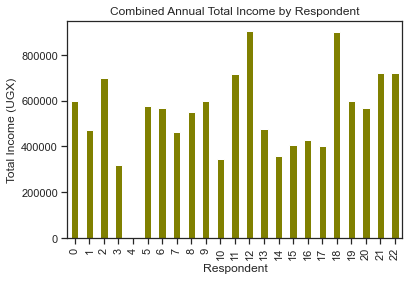

In [52]:
#Task 8 - Fees & Collection (p9)

#Annual WUC Income by fee & household, donations (p5)
#Bar Graph (Total Annual Income)
finances['Total Income'].plot(kind='bar', color='olive')
plt.title('Combined Annual Total Income by Respondent')
plt.xlabel('Respondent')
plt.ylabel('Total Income (UGX)');

In [53]:
#Task 9 - O&M Monitoring; Repair (p1) 

#13 - Are you monitoring the source and how? (p1)
mon_count = 0
for r in range(23):
    if 'yes' in data.iloc[r, 25]:
        mon_count = mon_count + 1
print('Percentage of Respondents Monitoring Water Use:', (mon_count/23)*100, '%') #all respondents said yes

a_count = 0
b_count = 0
c_count = 0
ab_count = 0
ac_count = 0
bc_count = 0
abc_count = 0
nabc_count = 0
for r in range (23):
    if 'a' in data.iloc[r, 25]:
        a_count = a_count + 1
    if 'b' in data.iloc[r, 25]:
        b_count = b_count + 1
    if 'c' in data.iloc[r, 25]:
        c_count = c_count + 1
    if 'a' and 'b' in data.iloc[r, 25]:
        ab_count = ab_count + 1
    if 'a' and 'c' in data.iloc[r, 25]:
        ac_count = ac_count + 1
    if 'b' and 'c' in data.iloc[r, 25]:
        bc_count = bc_count +1
    if 'a' and 'b' and 'c' in data.iloc[r, 25]:
        abc_count = abc_count + 1
    if ('a' and 'b' and 'c') not in data.iloc[r, 25]:
        nabc_count = nabc_count + 1
a_perc = round((a_count*100/23), 1)
b_perc = round((b_count*100/23), 1)
c_perc = round((c_count*100/23), 1)
print('Percentage with Fencing:', a_perc, '%')
print('Percentage with Guards:', b_perc, '%')
print('Percentage with Community Observation:', c_perc, '%')

mon_type_count = pd.value_counts(data[13])
mon_type_count

Percentage of Respondents Monitoring Water Use: 100.0 %
Percentage with Fencing: 43.5 %
Percentage with Guards: 78.3 %
Percentage with Community Observation: 43.5 %


yes; a; b    9
yes; b; c    7
yes; c       2
yes          2
yes; b       2
yes; a; c    1
Name: 13, dtype: int64

In [54]:
#Task 9 - O&M Monitoring; Repair (p2)

#13 - Monitoring Source & how (p2)

#Creating a DataFrame to hold information
mon_columns = ['Monitoring', 'Fencing', 'Guards', 'Community Observation']
mon_type = pd.DataFrame(columns = mon_columns)

for r in range(23):
    for c in mon_columns:
        if 'yes' in data.iloc[r, 25]:
            mon_type.at[r, 'Monitoring'] = 'yes'
        else:
            mon_type.at[r, 'Monitoring'] = 'no'
        if 'a' in data.iloc[r, 25]:
            mon_type.at[r, 'Fencing'] = 'yes'
        else:
            mon_type.at[r, 'Fencing'] = 'no'
        if 'b' in data.iloc[r, 25]:
            mon_type.at[r, 'Guards'] = 'yes'
        else:
            mon_type.at[r, 'Guards'] = 'no'
        if 'c' in data.iloc[r, 25]:
            mon_type.at[r, 'Community Observation'] = 'yes'
        else:
            mon_type.at[r, 'Community Observation'] = 'no'

mon_type

,Monitoring,Fencing,Guards,Community Observation
0,yes,no,no,yes
1,yes,yes,yes,no
2,yes,no,no,no
3,yes,no,yes,yes
4,yes,yes,yes,no
5,yes,no,yes,no
6,yes,no,yes,no
7,yes,yes,yes,no
8,yes,no,yes,yes
9,yes,yes,yes,no


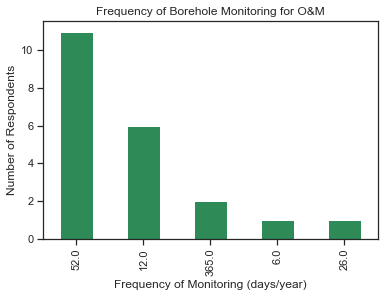

In [55]:
#Task 9 - O&M Monitoring; Repair (p3)

#14 - Frequency of monitoring for maintenance (p1)
mon_f = pd.value_counts(data[14])
mon_f.plot(kind='bar', color='seagreen')
plt.title('Frequency of Borehole Monitoring for O&M')
plt.xlabel('Frequency of Monitoring (days/year)')
plt.ylabel('Number of Respondents');

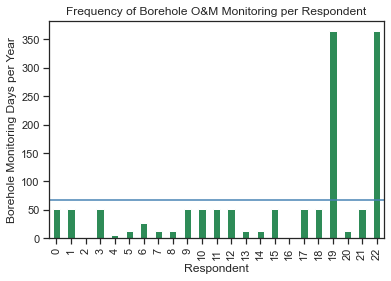

In [56]:
#Task 9 - O&M Monitoring; Repair (p4)

#14 - Frequency of monitoring for maintenance (p2)
data[14].plot(kind='bar', color='seagreen')
plt.hlines(y=67, xmin=-1, xmax=23, color='steelblue')
plt.title('Frequency of Borehole O&M Monitoring per Respondent')
plt.xlabel('Respondent')
plt.ylabel('Borehole Monitoring Days per Year');

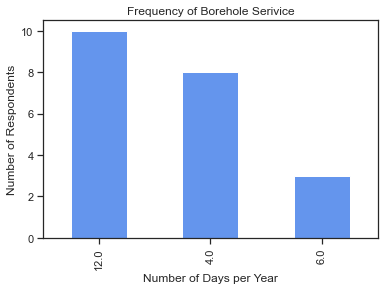

In [57]:
#Task 9 - O&M Monitoring; Repair (p5)

#15 - Frequency of borehole service (p1)
service_f = pd.value_counts(data[15])
service_f.plot(kind='bar', color='cornflowerblue')
plt.title('Frequency of Borehole Serivice')
plt.xlabel('Number of Days per Year')
plt.ylabel('Number of Respondents');

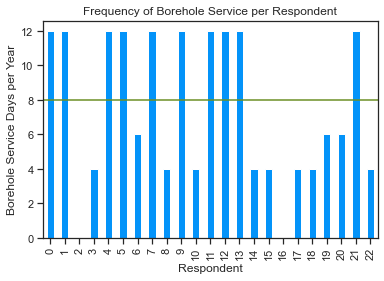

In [58]:
#Task 9 - O&M Monitoring; Repair (p6)

#15 - Frequency of borehole serivce (p2)
data[15].plot(kind='bar')
plt.hlines(y=8, xmin=-1, xmax=23, color='olivedrab')
plt.title('Frequency of Borehole Service per Respondent')
plt.xlabel('Respondent')
plt.ylabel('Borehole Service Days per Year');

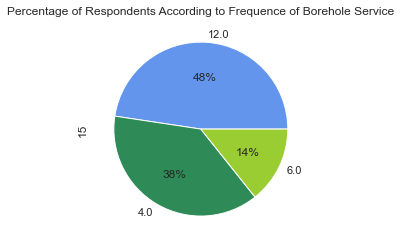

In [59]:
#Task 9 - O&M Monitoring; Repair (p7)

#15 - Frequency of borehole service (p3)
service_f.plot(kind='pie', autopct='%1.0f%%', colors=['cornflowerblue', 'seagreen', 'yellowgreen'])
plt.title('Percentage of Respondents According to Frequence of Borehole Service');

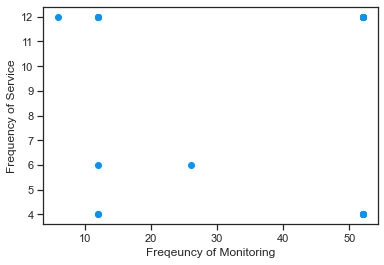

In [60]:
#Task 9 - O&M Monitoring (p8)

#14, 15 - Frequency of Monitoring & Service (p1)
#Is there a relationship between frequency of monitoring and frequency of service?

#Isolating Data
o_m = data.drop(index=[2, 16, 19, 22])
x_var = o_m[14]
y_var = o_m[15]

#Scatter Plot
plt.scatter(x_var, y_var)
plt.xlabel('Freqeuncy of Monitoring')
plt.ylabel('Frequency of Service');

#Outlying points are the daily monitoring - removed those points; removed missing data

p-value: 3.856080414959015e-05
                                 OLS Regression Results                                
Dep. Variable:                     15   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.598
Method:                 Least Squares   F-statistic:                              29.27
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                    3.86e-05
Time:                        14:22:56   Log-Likelihood:                         -60.046
No. Observations:                  19   AIC:                                      122.1
Df Residuals:                      18   BIC:                                      123.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'Frequency of Service')

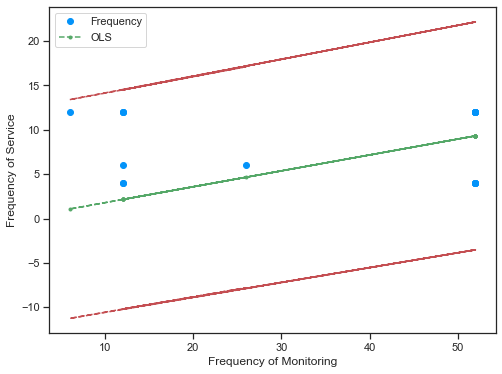

In [61]:
#Task 9 - O&M Monitoring (p9)

#14, 15 - Frequency of Monitoring & Service (p2)
#Linear Regression
import statsmodels.api as sm

o_m_ols = sm.OLS(y_var, x_var)
o_m_reg = o_m_ols.fit()
print('p-value:', o_m_reg.pvalues.loc[14])
print(o_m_reg.summary())
print('Parameters:', o_m_reg.params)
print('R2:', o_m_reg.rsquared)
print('Standard errors:', o_m_reg.bse)
print('Predicted values:', o_m_reg.predict())

om_ols = o_m_reg.get_prediction()
iv_l = om_ols.summary_frame()['obs_ci_lower']
iv_u = om_ols.summary_frame()['obs_ci_upper']

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_var, y_var, 'o', label='Frequency')
ax.plot(x_var, o_m_reg.fittedvalues, 'g--.', label='OLS')
ax.plot(x_var, iv_u, 'r--')
ax.plot(x_var, iv_l, 'r--')
ax.legend(loc='best')
ax.set_xlabel('Frequency of Monitoring')
ax.set_ylabel('Frequency of Service')

a = Experienced and Trained Water User
b = Skilled Hand Pump Mechanic


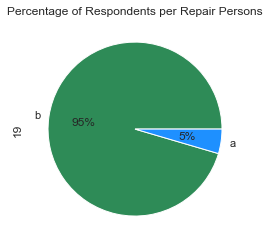

In [62]:
#Task 9 - O&M Monitoring; Repair (p10)

#19 - Approach to borehole repair
repair_count = pd.value_counts(data[19])
repair_count.plot(kind='pie', autopct='%1.0f%%', colors=['seagreen', 'dodgerblue'])
plt.title('Percentage of Respondents per Repair Persons');
print('a = Experienced and Trained Water User')
print('b = Skilled Hand Pump Mechanic')

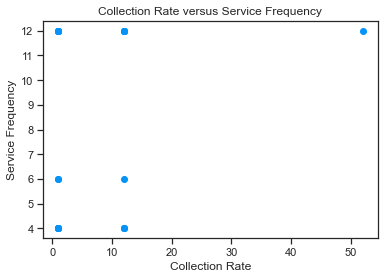

In [63]:
#Task 8/9 - Finances & Repair (p1)

#Is there a relationship between frequency of service and frequency of fee collection?
#Premise of this question is that if money flows more consistently, more likely to service more frequently

#data[15] = frequency of service
#data['12.b.2'] = collection rate

#Isolating the Data
finance_repair = data.copy()
finance_repair = finance_repair[[15, '12.b.2']]
finance_repair = finance_repair.dropna()
finance_repair = finance_repair.reset_index(drop=True)

finance_repair

#Creating x and Y variables
#X
collection_rate = finance_repair['12.b.2']
#Y
service_frequency = finance_repair[15]

#Scatter Plot
plt.scatter(collection_rate, service_frequency)
plt.title('Collection Rate versus Service Frequency')
plt.xlabel('Collection Rate')
plt.ylabel('Service Frequency');

p-value: 0.003681944229095977
Parameters: 12.b.2    0.389866
dtype: float64
R2: 0.3507859605649932
Standard errors: 12.b.2    0.118597
dtype: float64
Predicted values: [20.27300931  4.67838676  0.38986556  0.38986556  0.38986556  0.38986556
  4.67838676  0.38986556  0.38986556  4.67838676  0.38986556  0.38986556
  4.67838676  0.38986556  4.67838676  4.67838676  0.38986556  4.67838676
  0.38986556  4.67838676  0.38986556]
                                 OLS Regression Results                                
Dep. Variable:                     15   R-squared (uncentered):                   0.351
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              10.81
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                     0.00368
Time:                        14:22:59   Log-Likelihood:                         -71.248
No. Observations:                  21   AIC:   

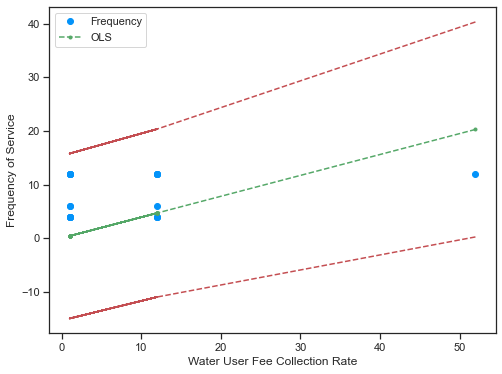

In [64]:
#Task 8/9 - Finances & Repair (p2)

#Linear Regression (same as Task 9)
import statsmodels.api as sm

#sm.OLS(y_var, x_var)
f_r_ols = sm.OLS(service_frequency, collection_rate)
fr_reg = f_r_ols.fit()
print('p-value:', fr_reg.pvalues.loc['12.b.2'])
print('Parameters:', fr_reg.params)
print('R2:', fr_reg.rsquared)
print('Standard errors:', fr_reg.bse)
print('Predicted values:', fr_reg.predict())
print(fr_reg.summary())

fr_ols = fr_reg.get_prediction()
iv_l = fr_ols.summary_frame()['obs_ci_lower']
iv_u = fr_ols.summary_frame()['obs_ci_upper']

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(collection_rate, service_frequency, 'o', label='Frequency')
ax.plot(collection_rate, fr_reg.fittedvalues, 'g--.', label='OLS')
ax.plot(collection_rate, iv_u, 'r--')
ax.plot(collection_rate, iv_l, 'r--')
ax.legend(loc='best')
ax.set_xlabel('Water User Fee Collection Rate')
ax.set_ylabel('Frequency of Service');

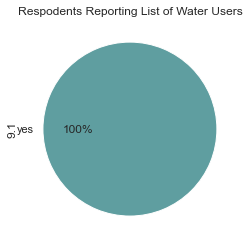

In [65]:
#Task 10 - Documentations (p1)

#9.1 - List of Water Users
wuc_list = pd.value_counts(data[9.1], sort=True)
wuc_list.plot(kind='pie', autopct='%1.0f%%', colors=['cadetblue'])
plt.title('Respodents Reporting List of Water Users');

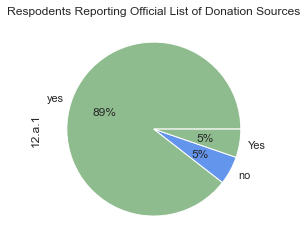

In [66]:
#Task 10 - Documentation (p2)

#12.a.1 - Donations
donation_list = pd.value_counts(data['12.a.1'], sort=True)
donation_list.plot(kind='pie', autopct='%1.0f%%', colors=['darkseagreen', 'cornflowerblue'])
plt.title('Respodents Reporting Official List of Donation Sources');

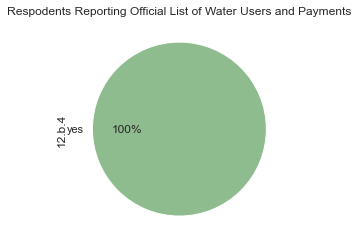

In [67]:
#Task 10 - Documentaion (p3)

#12.b.4 - User and Payments
user_list = pd.value_counts(data['12.b.4'], sort=True)
user_list.plot(kind='pie', autopct='%1.0f%%', colors=['darkseagreen', 'cornflowerblue'])
plt.title('Respodents Reporting Official List of Water Users and Payments');

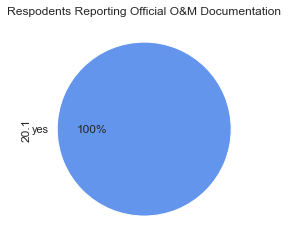

In [68]:
#Task 10 - Documentation (p4)

#20.1 - O&M documentation
om_list = pd.value_counts(data[20.1], sort=True)
om_list.plot(kind='pie', autopct='%1.0f%%', colors=['cornflowerblue', 'darkseagreen'])
plt.title('Respodents Reporting Official O&M Documentation');

In [69]:
#End of Simple Answer (p1)
#Creating a pairplot to see the relationship between the numerical answers that we can determine (easily)

#Isolated Data
simple_df = data.copy()
simple_df = simple_df[[4, '6_women', '6_men', '6_persons-with-disabilities', 8, 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]]
simple_df

,4,6_women,6_men,6_persons-with-disabilities,8,9.2,11,12.a.3,12.b.1,12.b.2,14,15
0,6.0,3.0,3.0,0.0,1,100.0,65000.0,100000,5000,52,52.0,12.0
1,6.0,4.0,2.0,0.0,12,70.0,100000.0,120000,5000,12,52.0,12.0
2,6.0,2.0,4.0,0.0,12,100.0,100000.0,100000,6000,12,NaN,NaN
3,6.0,2.0,4.0,1.0,3,46.0,200000.0,90000,5000,1,52.0,4.0
4,6.0,2.0,4.0,0.0,2,NaN,NaN,110000,6000,1,6.0,12.0
5,6.0,3.0,3.0,0.0,3,100.0,50000.0,75000,5000,1,12.0,12.0
6,6.0,2.0,4.0,0.0,3,100.0,220000.0,70000,5000,1,26.0,6.0
7,7.0,2.0,4.0,1.0,6,60.0,200000.0,105000,6000,12,12.0,12.0
8,6.0,3.0,3.0,0.0,4,75.0,55000.0,100000,6000,1,12.0,4.0
9,7.0,2.0,3.0,1.0,12,90.0,70000.0,150000,5000,1,52.0,12.0


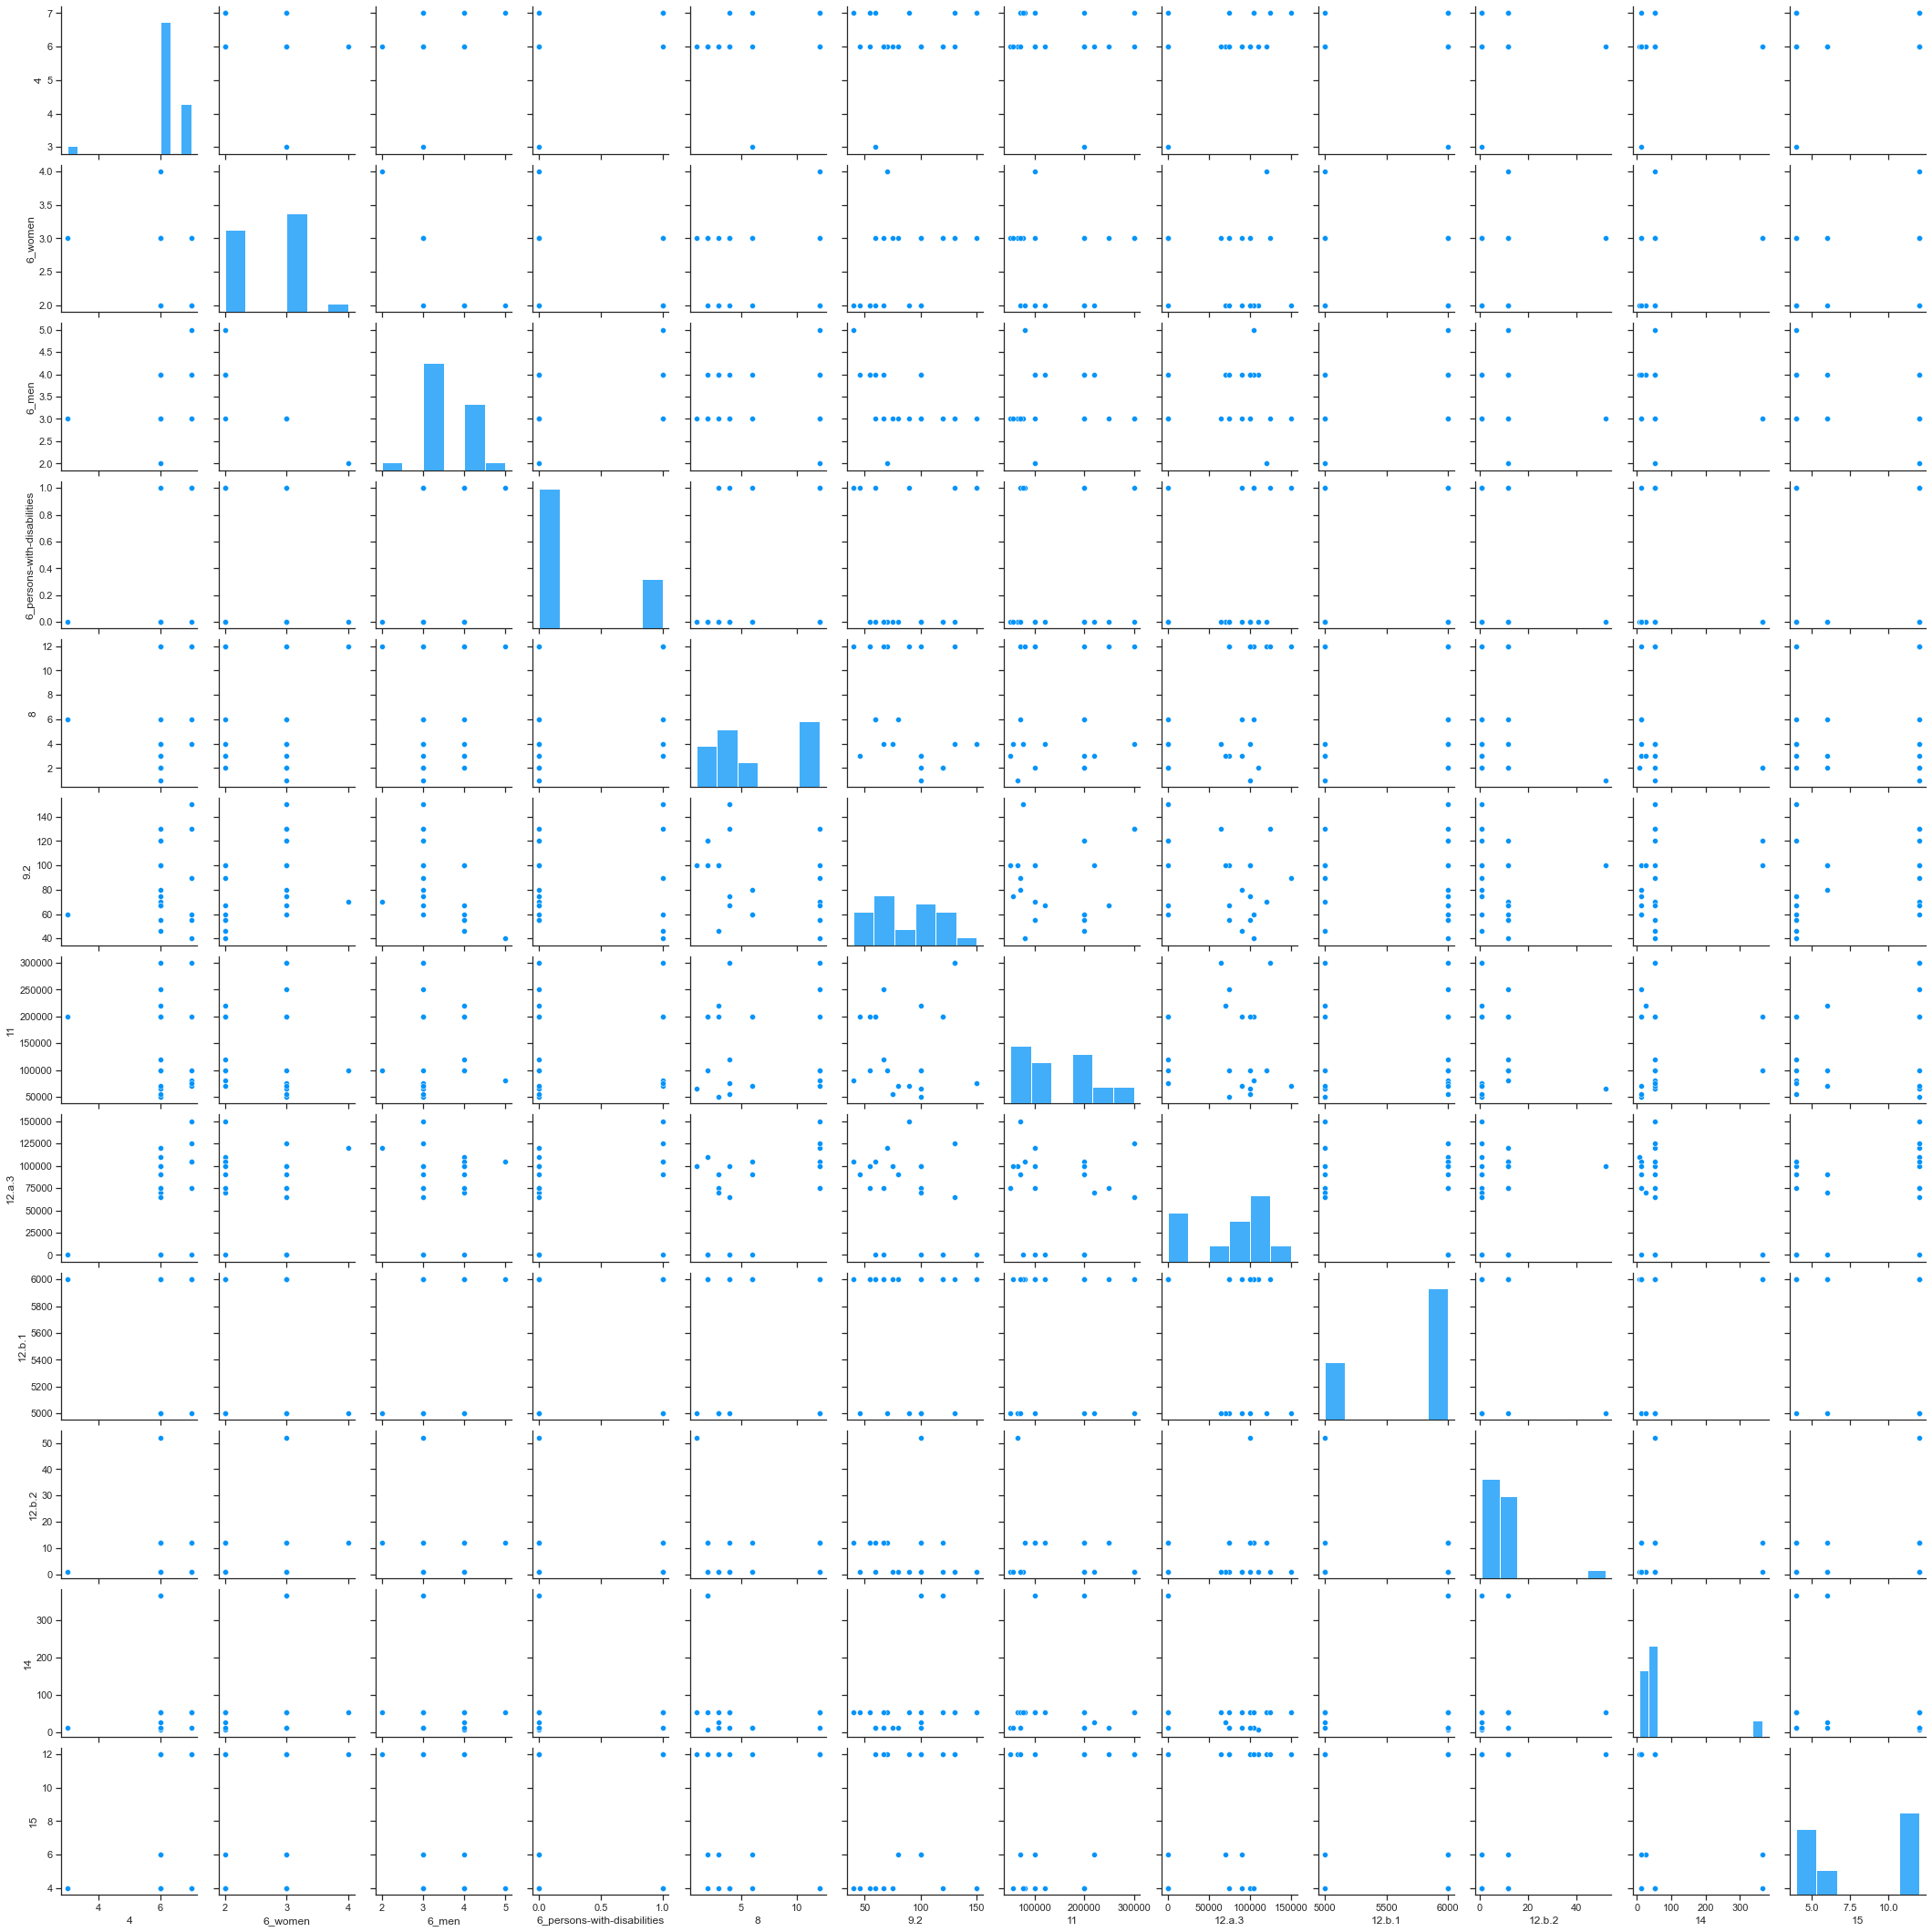

In [70]:
#End of Simple Answer (p2)

#Pairplot Visualization
sns.pairplot(simple_df);

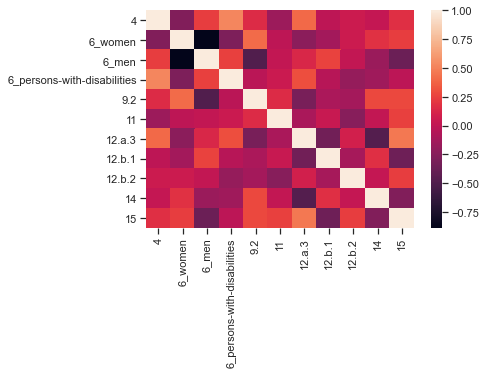

In [71]:
#End of Simple Answer (p3)

#Heatmap Visualization
simple_corr = simple_df.corr(method='pearson')
sns.heatmap(simple_corr);

##### End of Simple Answer Descriptors, Visualizations, Statistics (linear regression), and Naive Bayes Classification Review

## Text Wrangling & Analysis

#### Wrangling and Counting

In [72]:
#Load Data
challenges_df = pd.read_excel('E:/ISU/Graduate/Courses/F21/ABE 516X/ISU-UP_Challenges.xlsx')
print('DataFrame Shape:', challenges_df.shape)
challenges_df = challenges_df.drop(index=[8], columns=['Respondent'])
challenges_df = challenges_df.reset_index(drop=True)
challenges_df.head()

DataFrame Shape: (24, 13)


,Training Frequency,Households,O&M Cost,Donations,User Fee,Collection Rate,Monitoring Rate,Service Rate,Challenge 1,Challenge 2,Challenge 3,Challenge 4
0,once a year,100.0,60000-70000,100000,5000 per household per year,weekly,weekly,monthly,misunderstandings of committee members,failure of community members to pay fees,none,none
1,monthly,70.0,100000,40000-200000,500 per household per year,monthly,weekly,monthly,no model borehole,poor sanitation at the borehole by animals,the water is salty (hard water),destruction of fence by animals
2,monthly,100.0,100000,100000,500 per household per month,monthly,NaN,NaN,failure of community people to clean the borehole,poor sanitation at the borehole by animals,none,none
3,every 4 months,46.0,200000,60000-120000,5000 per household per year,annually,weekly,every 3 months,disunity during fee collection,fetching water at night,destruction of fence by animals,none
4,biannually,NaN,NaN,100000-120000,6000 per household per year,annually,every 2 months,monthly,faulty padlocks,disrespect of WUC members by the water users,member don't attend meetings,destruction of fence by animals


In [73]:
#Data Wrangling (again) for data

#Deal with assumptions

#11 - O&M Cost
challenges_df.iloc[0, 2] = 65000
challenges_df.iloc[18, 2] = 75000
challenges_df['O&M Cost'].fillna(challenges_df['O&M Cost'].mean())
#12.a.3 - Donations
challenges_df.iloc[1, 3] = 120000
challenges_df.iloc[3, 3] = 90000
challenges_df.iloc[4, 3] = 110000
challenges_df.iloc[5, 3] = 75000
challenges_df.iloc[6, 3] = 70000
challenges_df.iloc[7, 3] = 105000
challenges_df.iloc[9, 3] = 150000
challenges_df.iloc[10, 3] = 105000
challenges_df.iloc[11, 3] = 65000
challenges_df.iloc[12, 3] = 125000
challenges_df.iloc[13, 3] = 75000
challenges_df.iloc[15, 3] = 75000
for r in range (23):
    if challenges_df.iloc[r, 3] == 'none':
        challenges_df.iloc[r, 3] = 0

#Remove capitalized letters
wordcol = ['Training Frequency', 'User Fee', 'Collection Rate', 'Monitoring Rate', 'Service Rate', 'Challenge 1', 'Challenge 2', 'Challenge 3', 'Challenge 4']
for c in wordcol:
    #print(data[c].dtype)
    challenges_df[c] = challenges_df[c].str.lower()

#Adjust time to numerical values
timecol = [0, 5, 6, 7]

for r in range (23):
    for c in timecol:
        if challenges_df.iloc[r, c] == 'once a year' or challenges_df.iloc[r, c] == 'yearly' or challenges_df.iloc[r, c] == 'annually':
            challenges_df.iloc[r, c] = 1
        if challenges_df.iloc[r, c] == 'biannually':
            challenges_df.iloc[r, c] = 2
        if challenges_df.iloc[r, c] == '3 times per year' or challenges_df.iloc[r, c] == 'every 4 months':
            challenges_df.iloc[r, c] = 3
        if challenges_df.iloc[r, c] == '4 times per year' or challenges_df.iloc[r, c] == 'every 3 months':
            challenges_df.iloc[r, c] = 4
        if challenges_df.iloc[r, c] == '6 times per year' or challenges_df.iloc[r, c] == 'every 2 months':
            challenges_df.iloc[r, c] = 6
        if challenges_df.iloc[r, c] == 'monthly':
            challenges_df.iloc[r, c] = 12
        if challenges_df.iloc[r, c] == 'biweekly':
            challenges_df.iloc[r, c] = 26
        if challenges_df.iloc[r, c] == 'weekly':
            challenges_df.iloc[r, c] = 52
        if challenges_df.iloc[r, c] == 'daily':
            challenges_df.iloc[r, c] = 365

#Adjust User Fee
data.iloc[1, 4] = '5000 per household per year'
data.iloc[6, 4] = '5000 per household per year'

for r in range(23):
    if challenges_df.iloc[r, 4][-5:] == 'month':
        challenges_df['User Fee'] = challenges_df['User Fee'].str.slice(0, 3)
    else:
        challenges_df['User Fee'] = challenges_df['User Fee'].str.slice(0, 4)

#Convert from string to integer
challenges_df[['Training Frequency', 'Households', 'O&M Cost', 'Donations', 'User Fee', 'Collection Rate', 'Monitoring Rate', 'Service Rate']] = challenges_df[['Training Frequency', 'Households', 'O&M Cost', 'Donations', 'User Fee', 'Collection Rate', 'Monitoring Rate', 'Service Rate']].apply(pd.to_numeric)
challenges_df.dtypes

#User Fee per Year
for r in range(23):
    if challenges_df.iloc[r, 4] <= 4999:
        challenges_df.iloc[r, 4] = (challenges_df.iloc[r, 4]) * 12

challenges_df

,Training Frequency,Households,O&M Cost,Donations,User Fee,Collection Rate,Monitoring Rate,Service Rate,Challenge 1,Challenge 2,Challenge 3,Challenge 4
0,1,100.0,65000.0,100000,5000,52,52.0,12.0,misunderstandings of committee members,failure of community members to pay fees,none,none
1,12,70.0,100000.0,120000,6000,12,52.0,12.0,no model borehole,poor sanitation at the borehole by animals,the water is salty (hard water),destruction of fence by animals
2,12,100.0,100000.0,100000,6000,12,NaN,NaN,failure of community people to clean the borehole,poor sanitation at the borehole by animals,none,none
3,3,46.0,200000.0,90000,5000,1,52.0,4.0,disunity during fee collection,fetching water at night,destruction of fence by animals,none
4,2,NaN,NaN,110000,6000,1,6.0,12.0,faulty padlocks,disrespect of wuc members by the water users,member don't attend meetings,destruction of fence by animals
5,3,100.0,50000.0,75000,5000,1,12.0,12.0,none,none,none,none
6,3,100.0,220000.0,70000,5000,1,26.0,6.0,disunity during fee collection,children misusing borehole,misunderstanding during borehole work,none
7,6,60.0,200000.0,105000,6000,12,12.0,12.0,theft of borehole parts,failure of community members to pay fees,none,none
8,4,75.0,55000.0,100000,6000,1,12.0,4.0,misunderstandings of committee members,faulty padlocks,none,none
9,12,90.0,70000.0,150000,5000,1,52.0,12.0,failure of to comply with borehole rules and r...,failure of community members to pay fees,none,none


In [74]:
#Removing Stop Words (p1)

#Required package
%pip install gensim
import gensim
from gensim.parsing.preprocessing import remove_stopwords

Note: you may need to restart the kernel to use updated packages.


In [75]:
#Removing Stop Words (p2)

for r in range (23):
    for c in range(8, 12):
        challenges_df.iloc[r, c] = remove_stopwords(challenges_df.iloc[r, c])

challenges_df

,Training Frequency,Households,O&M Cost,Donations,User Fee,Collection Rate,Monitoring Rate,Service Rate,Challenge 1,Challenge 2,Challenge 3,Challenge 4
0,1,100.0,65000.0,100000,5000,52,52.0,12.0,misunderstandings committee members,failure community members pay fees,,
1,12,70.0,100000.0,120000,6000,12,52.0,12.0,model borehole,poor sanitation borehole animals,water salty (hard water),destruction fence animals
2,12,100.0,100000.0,100000,6000,12,NaN,NaN,failure community people clean borehole,poor sanitation borehole animals,,
3,3,46.0,200000.0,90000,5000,1,52.0,4.0,disunity fee collection,fetching water night,destruction fence animals,
4,2,NaN,NaN,110000,6000,1,6.0,12.0,faulty padlocks,disrespect wuc members water users,member don't attend meetings,destruction fence animals
5,3,100.0,50000.0,75000,5000,1,12.0,12.0,,,,
6,3,100.0,220000.0,70000,5000,1,26.0,6.0,disunity fee collection,children misusing borehole,misunderstanding borehole work,
7,6,60.0,200000.0,105000,6000,12,12.0,12.0,theft borehole parts,failure community members pay fees,,
8,4,75.0,55000.0,100000,6000,1,12.0,4.0,misunderstandings committee members,faulty padlocks,,
9,12,90.0,70000.0,150000,5000,1,52.0,12.0,failure comply borehole rules regulations,failure community members pay fees,,


In [76]:
from collections import Counter
count1 = Counter(challenges_df['Challenge 1']).most_common()
count1

[('disunity fee collection', 7),
 ('misunderstandings committee members', 4),
 ('failure community members pay fees', 3),
 ('', 2),
 ('model borehole', 1),
 ('failure community people clean borehole', 1),
 ('faulty padlocks', 1),
 ('theft borehole parts', 1),
 ('failure comply borehole rules regulations', 1),
 ('failure wash jerrycans', 1),
 ('disrespect wuc members water users', 1)]

In [77]:
count2 = Counter(challenges_df['Challenge 2']).most_common()
count2

[('failure community members pay fees', 5),
 ('', 4),
 ('disrespect wuc members water users', 3),
 ('poor sanitation borehole animals', 2),
 ('faulty padlocks', 2),
 ('misunderstanding borehole work', 2),
 ('fetching water night', 1),
 ('children misusing borehole', 1),
 ('theft borehole parts', 1),
 ('destruction fence stray animals', 1),
 ('misunderstandings committee members', 1)]

In [78]:
count3 = Counter(challenges_df['Challenge 3']).most_common()
count3

[('', 16),
 ('water salty (hard water)', 1),
 ('destruction fence animals', 1),
 ("member don't attend meetings", 1),
 ('misunderstanding borehole work', 1),
 ('disrespect wuc members water users', 1),
 ('children misusing borehole', 1),
 ('misunderstandings committee members', 1)]

In [79]:
count4 = Counter(challenges_df['Challenge 4']).most_common()
count4

[('', 21), ('destruction fence animals', 2)]

#### Text Visulizations

In [80]:
#Install WordCloud package
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

#?WordCloud

Note: you may need to restart the kernel to use updated packages.


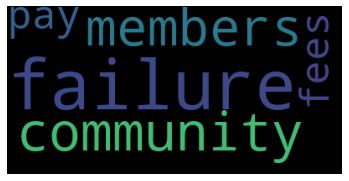

In [81]:
#Word Cloud Testing (p1)
text = challenges_df.iloc[0, 9]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

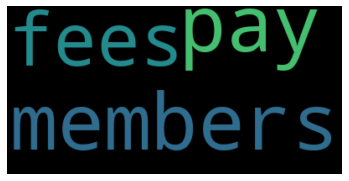

In [82]:
#Word Cloud Testing (p2)
#Remove non-descriptive words
stopwords = set(STOPWORDS)
stopwords.update(['community', 'failure'])
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

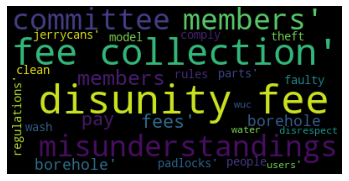

In [83]:
#WordCloud Testing (p3)

#Challenge 1
text1 = challenges_df['Challenge 1'].values
stopwords1 = set(STOPWORDS)
stopwords1.update(['community', 'failure'])
wordcloud = WordCloud(stopwords=stopwords1).generate(str(text1))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

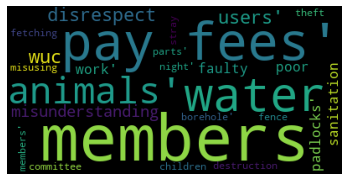

In [84]:
#WordCloud Testing (p4)

#Challenge 2
text2 = challenges_df['Challenge 2'].values
stopwords2 = set(STOPWORDS)
stopwords2.update(['community', 'failure', 'borehole'])
wordcloud = WordCloud(stopwords=stopwords2).generate(str(text2))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

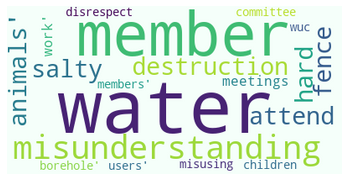

In [85]:
#WordCloud Testing (p5)

#Challenge 3
text3 = challenges_df['Challenge 3'].values
stopwords3 = set(STOPWORDS)
stopwords3.update(['community', 'failure', 'borehole'])
wordcloud = WordCloud(stopwords=stopwords3, background_color='mintcream').generate(str(text3))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis('off')
plt.show()

In [86]:
#Combining the challenges
list1 = challenges_df['Challenge 1'].astype(str).values.tolist()
list2 = challenges_df['Challenge 2'].astype(str).values.tolist()
list3 = challenges_df['Challenge 3'].astype(str).values.tolist()
list4 = challenges_df['Challenge 4'].astype(str).values.tolist()
combined_list = list1 + list2 + list3 + list4
combined_list

['misunderstandings committee members',
 'model borehole',
 'failure community people clean borehole',
 'disunity fee collection',
 'faulty padlocks',
 '',
 'disunity fee collection',
 'theft borehole parts',
 'misunderstandings committee members',
 'failure comply borehole rules regulations',
 'disunity fee collection',
 'failure community members pay fees',
 'disunity fee collection',
 '',
 'disunity fee collection',
 'disunity fee collection',
 'failure wash jerrycans',
 'disrespect wuc members water users',
 'misunderstandings committee members',
 'failure community members pay fees',
 'misunderstandings committee members',
 'failure community members pay fees',
 'disunity fee collection',
 'failure community members pay fees',
 'poor sanitation borehole animals',
 'poor sanitation borehole animals',
 'fetching water night',
 'disrespect wuc members water users',
 '',
 'children misusing borehole',
 'failure community members pay fees',
 'faulty padlocks',
 'failure community membe

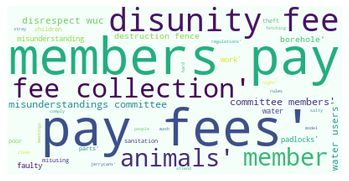

In [87]:
#Create WordCloud for Combined List
wordcloud = WordCloud(stopwords=stopwords3, background_color='mintcream').generate(str(combined_list))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis('off');

In [88]:
#Creating Counted list and DataFrame
total_common_list = Counter(combined_list).most_common()
tcl_df = pd.DataFrame.from_dict(total_common_list)
tcl_df = tcl_df.rename(columns={0: "Common Challenges", 1 : "Count"})
tcl_df = tcl_df.drop(index=0)
tcl_df = tcl_df.reset_index(drop=True)
tcl_df

,Common Challenges,Count
0,failure community members pay fees,8
1,disunity fee collection,7
2,misunderstandings committee members,6
3,disrespect wuc members water users,5
4,faulty padlocks,3
5,misunderstanding borehole work,3
6,destruction fence animals,3
7,theft borehole parts,2
8,poor sanitation borehole animals,2
9,children misusing borehole,2


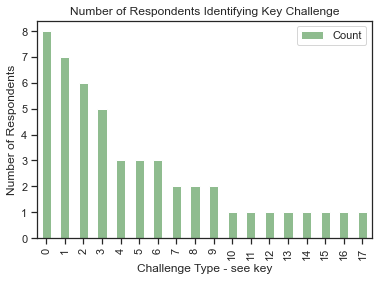

In [89]:
#Bar Graph of Common Challenges
tcl_df.plot(kind='bar', color='darkseagreen')
plt.title('Number of Respondents Identifying Key Challenge')
plt.xlabel('Challenge Type - see key')
plt.ylabel('Number of Respondents');

#### Comparisons

In [90]:
#What about grouping by fee?
challenges_fee = challenges_df.groupby('User Fee')
challenges_fee.describe().head()

Training Frequency                                                  \
                      count      mean       std  min  25%  50%    75%   max   
User Fee                                                                      
5000                    6.0  4.333333  3.881580  1.0  3.0  3.0   3.75  12.0   
6000                   17.0  7.176471  4.362271  2.0  4.0  6.0  12.00  12.0   

         Households             ... Monitoring Rate        Service Rate  \
              count       mean  ...             75%    max        count   
User Fee                        ...                                       
5000            6.0  94.333333  ...            52.0   52.0          6.0   
6000           16.0  84.312500  ...            52.0  365.0         15.0   

                                                          
              mean       std  min  25%   50%   75%   max  
User Fee                                                  
5000      9.666667  3.669696  4.0  7.5  12.0  12.0  12.0  
6000      7.466667  3.888934  4.0  4.0   6.0  12.0  12.0  

[2 rows x 56 columns]

In [91]:
#Isolating the Challenges to 5000 User Fee

#feelist1 = challenges_fee['Challenge 1'].astype(str).values.tolist()

#User Fee = 5000 per year
fee_5000 = challenges_df.copy()

for r in range(23):
    if challenges_df.iloc[r, 4] == 6000:
        fee_5000 = fee_5000.drop(index=r)
fee_5000

,Training Frequency,Households,O&M Cost,Donations,User Fee,Collection Rate,Monitoring Rate,Service Rate,Challenge 1,Challenge 2,Challenge 3,Challenge 4
0,1,100.0,65000.0,100000,5000,52,52.0,12.0,misunderstandings committee members,failure community members pay fees,,
3,3,46.0,200000.0,90000,5000,1,52.0,4.0,disunity fee collection,fetching water night,destruction fence animals,
5,3,100.0,50000.0,75000,5000,1,12.0,12.0,,,,
6,3,100.0,220000.0,70000,5000,1,26.0,6.0,disunity fee collection,children misusing borehole,misunderstanding borehole work,
9,12,90.0,70000.0,150000,5000,1,52.0,12.0,failure comply borehole rules regulations,failure community members pay fees,,
11,4,130.0,300000.0,65000,5000,1,52.0,12.0,failure community members pay fees,theft borehole parts,,


In [92]:
#Combining the challenges for 5000
fee5_1 = fee_5000['Challenge 1'].astype(str).values.tolist()
fee5_2 = fee_5000['Challenge 2'].astype(str).values.tolist()
fee5_3 = fee_5000['Challenge 3'].astype(str).values.tolist()
fee5_4 = fee_5000['Challenge 4'].astype(str).values.tolist()
combined_fee5 = fee5_1 + fee5_2 + fee5_3 + fee5_4
combined_fee5

['misunderstandings committee members',
 'disunity fee collection',
 '',
 'disunity fee collection',
 'failure comply borehole rules regulations',
 'failure community members pay fees',
 'failure community members pay fees',
 'fetching water night',
 '',
 'children misusing borehole',
 'failure community members pay fees',
 'theft borehole parts',
 '',
 'destruction fence animals',
 '',
 'misunderstanding borehole work',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

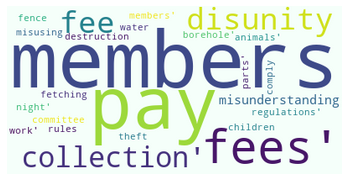

In [93]:
#Create WordCloud for 5000 List
stopwords5 = set(STOPWORDS)
stopwords5.update(['community', 'failure', 'borehole'])
wordcloud = WordCloud(stopwords=stopwords5, background_color='mintcream').generate(str(combined_fee5))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis('off');

In [94]:
#Creating Counted list and DataFrame - User Fee 5000
fee5_list = Counter(combined_fee5).most_common()
fee5_df = pd.DataFrame.from_dict(fee5_list)
fee5_df = fee5_df.rename(columns={0: "Common Challenges", 1 : "Count"})
fee5_df = fee5_df.drop(index=0)
fee5_df = fee5_df.reset_index(drop=True)
fee5_df

,Common Challenges,Count
0,failure community members pay fees,3
1,disunity fee collection,2
2,misunderstandings committee members,1
3,failure comply borehole rules regulations,1
4,fetching water night,1
5,children misusing borehole,1
6,theft borehole parts,1
7,destruction fence animals,1
8,misunderstanding borehole work,1


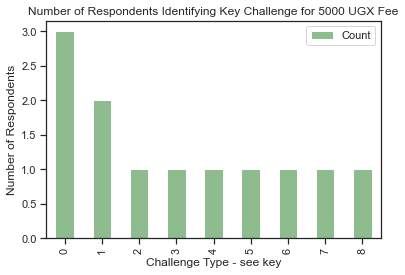

In [95]:
#Bar Graph of Common Challenges - 5000 User Fee
fee5_df.plot(kind='bar', color='darkseagreen')
plt.title('Number of Respondents Identifying Key Challenge for 5000 UGX Fee')
plt.xlabel('Challenge Type - see key')
plt.ylabel('Number of Respondents');

##### Note:  
Most common challenge for respondents with 5000 UGX as the water user fee is failure of the community member to pay their fees, the next being disunity during fee collection

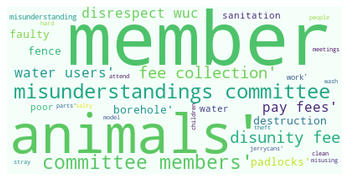

In [96]:
#User Fee = 6000 per year
fee_6000 = challenges_df.copy()

for r in range(23):
    if challenges_df.iloc[r, 4] == 5000:
        fee_6000 = fee_6000.drop(index=r)
fee_6000

#Combining the challenges for 6000
fee6_1 = fee_6000['Challenge 1'].astype(str).values.tolist()
fee6_2 = fee_6000['Challenge 2'].astype(str).values.tolist()
fee6_3 = fee_6000['Challenge 3'].astype(str).values.tolist()
fee6_4 = fee_6000['Challenge 4'].astype(str).values.tolist()
combined_fee6 = fee6_1 + fee6_2 + fee6_3 + fee6_4

#Create WordCloud for 6000 List
stopwords6 = set(STOPWORDS)
stopwords6.update(['community', 'failure', 'borehole'])
wordcloud = WordCloud(stopwords=stopwords6, background_color='mintcream').generate(str(combined_fee6))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis('off');

In [97]:
#Creating Counted list and DataFrame - User Fee 6000
fee6_list = Counter(combined_fee6).most_common()
fee6_df = pd.DataFrame.from_dict(fee6_list)
fee6_df = fee6_df.rename(columns={0: "Common Challenges", 1 : "Count"})
fee6_df = fee6_df.drop(index=0)
fee6_df = fee6_df.reset_index(drop=True)
fee6_df

,Common Challenges,Count
0,misunderstandings committee members,5
1,disunity fee collection,5
2,disrespect wuc members water users,5
3,failure community members pay fees,5
4,faulty padlocks,3
5,poor sanitation borehole animals,2
6,misunderstanding borehole work,2
7,destruction fence animals,2
8,model borehole,1
9,failure community people clean borehole,1


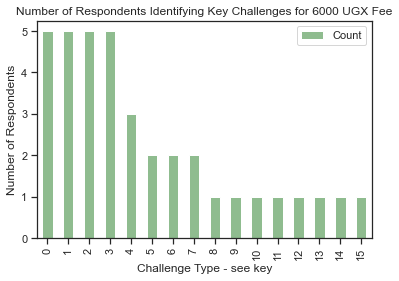

In [98]:
#Bar Graph of Common Challenges - user Fee 6000
fee6_df.plot(kind='bar', color='darkseagreen')
plt.title('Number of Respondents Identifying Key Challenges for 6000 UGX Fee')
plt.xlabel('Challenge Type - see key')
plt.ylabel('Number of Respondents');

##### Note:  
Most common challenge for respondents with 6000 UGX as the water user fee is failure of the community member to pay their fees, disunity during fee collection, and misunderstandings of or between committee members.   

I think because there are more Respondents reporting a 6000 UGX annual water user fee, that there are simply more responses for challenges. 

In [99]:
#Same Comparison process, but with collection rate
challenges_df['Collection Rate'].unique()

array([52, 12,  1], dtype=int64)

In [100]:
#Collection Rate Challenges

#Collection Rate - Weekly
#Isolation
rate_52 = challenges_df.copy()
for r in range(23):
    if challenges_df.iloc[r, 5] == 12:
        rate_52 = rate_52.drop(index=r)
    if challenges_df.iloc[r, 5] == 1:
        rate_52 = rate_52.drop(index=r)
#Combination
rate52_1 = rate_52['Challenge 1'].astype(str).values.tolist()
rate52_2 = rate_52['Challenge 2'].astype(str).values.tolist()
rate52_3 = rate_52['Challenge 3'].astype(str).values.tolist()
rate52_4 = rate_52['Challenge 4'].astype(str).values.tolist()
combined_rate52 = rate52_1 + rate52_2 + rate52_3 + rate52_4
#WordCloud
stopwords = set(STOPWORDS)
stopwords.update(['community', 'failure', 'borehole'])
wordcloud52 = WordCloud(stopwords=stopwords, background_color='mintcream').generate(str(combined_rate52))
#Counted List & DataFrame
rate52_list = Counter(combined_fee6).most_common()
rate52_df = pd.DataFrame.from_dict(rate52_list)
rate52_df = rate52_df.rename(columns={0: "Common Challenges", 1 : "Count"})
rate52_df = rate52_df.drop(index=0)
rate52_df = rate52_df.reset_index(drop=True)

#Collection Rate - Monthly
#Isolation
rate_12 = challenges_df.copy()
for r in range(23):
    if challenges_df.iloc[r, 5] == 52:
        rate_12 = rate_12.drop(index=r)
    if challenges_df.iloc[r, 5] == 1:
        rate_12 = rate_12.drop(index=r)
#Combination
rate12_1 = rate_12['Challenge 1'].astype(str).values.tolist()
rate12_2 = rate_12['Challenge 2'].astype(str).values.tolist()
rate12_3 = rate_12['Challenge 3'].astype(str).values.tolist()
rate12_4 = rate_12['Challenge 4'].astype(str).values.tolist()
combined_rate12 = rate12_1 + rate12_2 + rate12_3 + rate12_4
#WordCloud
wordcloud12 = WordCloud(stopwords=stopwords, background_color='mintcream').generate(str(combined_rate12))
#Counted List & DataFrame
rate12_list = Counter(combined_rate12).most_common()
rate12_df = pd.DataFrame.from_dict(rate12_list)
rate12_df = rate12_df.rename(columns={0: "Common Challenges", 1 : "Count"})
rate12_df = rate12_df.drop(index=0)
rate12_df = rate12_df.reset_index(drop=True)

#Collection Rate - Annually
#Isolation
rate_1 = challenges_df.copy()
for r in range(23):
    if challenges_df.iloc[r, 5] == 52:
        rate_1 = rate_1.drop(index=r)
    if challenges_df.iloc[r, 5] == 12:
        rate_1 = rate_1.drop(index=r)
#Combination
rate1_1 = rate_1['Challenge 1'].astype(str).values.tolist()
rate1_2 = rate_1['Challenge 2'].astype(str).values.tolist()
rate1_3 = rate_1['Challenge 3'].astype(str).values.tolist()
rate1_4 = rate_1['Challenge 4'].astype(str).values.tolist()
combined_rate1 = rate1_1 + rate1_2 + rate1_3 + rate1_4
#WordCloud
wordcloud1 = WordCloud(stopwords=stopwords, background_color='mintcream').generate(str(combined_rate1))
#Counted List & DataFrame
rate1_list = Counter(combined_rate1).most_common()
rate1_df = pd.DataFrame.from_dict(rate1_list)
rate1_df = rate1_df.rename(columns={0: "Common Challenges", 1 : "Count"})
rate1_df = rate1_df.drop(index=0)
rate1_df = rate1_df.reset_index(drop=True)

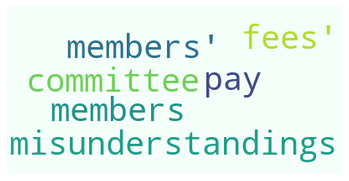

In [101]:
#Weekly Collection Rate WordCloud
plt.imshow(wordcloud52, interpolation='spline36')
plt.axis('off');

In [102]:
#Weekly Collection Rate Challenges
rate52_df

,Common Challenges,Count
0,misunderstandings committee members,5
1,disunity fee collection,5
2,disrespect wuc members water users,5
3,failure community members pay fees,5
4,faulty padlocks,3
5,poor sanitation borehole animals,2
6,misunderstanding borehole work,2
7,destruction fence animals,2
8,model borehole,1
9,failure community people clean borehole,1


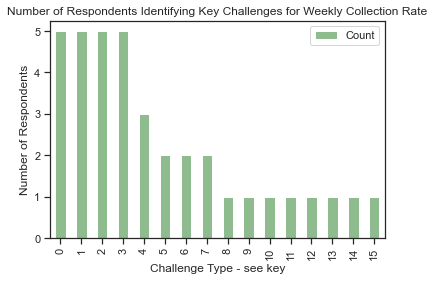

In [103]:
#Bar Graph of Common Challenges - Weekly
rate52_df.plot(kind='bar', color='darkseagreen')
plt.title('Number of Respondents Identifying Key Challenges for Weekly Collection Rate')
plt.xlabel('Challenge Type - see key')
plt.ylabel('Number of Respondents');

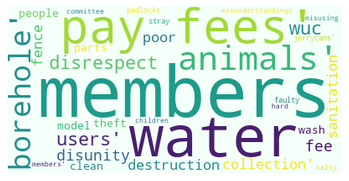

In [104]:
#Monthly Collection Rate WordCloud
plt.imshow(wordcloud12, interpolation='spline36')
plt.axis('off');

In [105]:
#Monthly Collection Rate Challenges
rate12_df

,Common Challenges,Count
0,failure community members pay fees,5
1,disrespect wuc members water users,3
2,disunity fee collection,2
3,poor sanitation borehole animals,2
4,model borehole,1
5,failure community people clean borehole,1
6,theft borehole parts,1
7,failure wash jerrycans,1
8,faulty padlocks,1
9,destruction fence stray animals,1


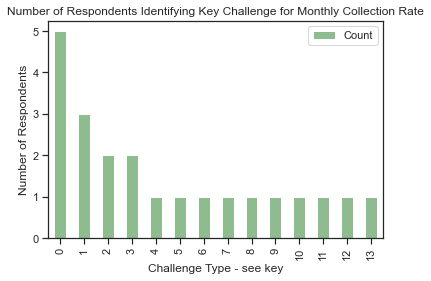

In [106]:
#Bar Graph of Common Challenges - Monthly
rate12_df.plot(kind='bar', color='darkseagreen')
plt.title('Number of Respondents Identifying Key Challenge for Monthly Collection Rate')
plt.xlabel('Challenge Type - see key')
plt.ylabel('Number of Respondents');

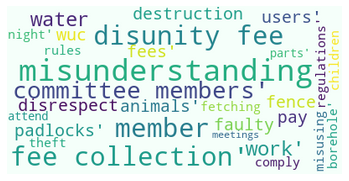

In [107]:
#Annual Collection Rate WordCloud
plt.imshow(wordcloud1, interpolation='spline36')
plt.axis('off');

In [108]:
#Annual Collection Rate Challenges
rate1_df

,Common Challenges,Count
0,disunity fee collection,5
1,misunderstandings committee members,4
2,misunderstanding borehole work,3
3,faulty padlocks,2
4,failure community members pay fees,2
5,disrespect wuc members water users,2
6,destruction fence animals,2
7,failure comply borehole rules regulations,1
8,fetching water night,1
9,children misusing borehole,1


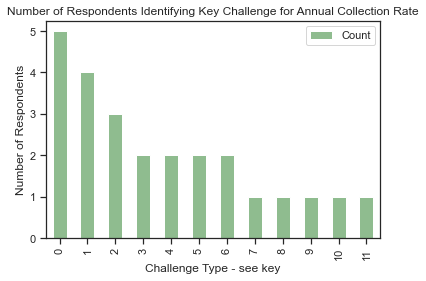

In [109]:
#Bar Graph of Common Challenges - Annual
rate1_df.plot(kind='bar', color='darkseagreen')
plt.title('Number of Respondents Identifying Key Challenge for Annual Collection Rate')
plt.xlabel('Challenge Type - see key')
plt.ylabel('Number of Respondents');

### Conclusion  
Challenges, regardless of the water user fee or the collection rate, remain consistently an unwillingness of the water user to pay the fee. This is demonstrated by "disunity during fee collection" and "failure of community members to pay fees" being one of the highest counted challenges. Misunderstandings of the committee members is also a frequent challenge reported among respondents.

##### End of Analysis

## Class Exercise  

By taking the wrangled data, can perform statistical analyses and view the relationships between two (or more) variables.   
This is best done with numerical information

In [110]:
#Class Exercise(1)
#Isolate the numerical data from the rest

simple_df = data.copy()
simple_df = simple_df[[4, '6_women', '6_men', '6_persons-with-disabilities', 8, 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]]
simple_df

,4,6_women,6_men,6_persons-with-disabilities,8,9.2,11,12.a.3,12.b.1,12.b.2,14,15
0,6.0,3.0,3.0,0.0,1,100.0,65000.0,100000,5000,52,52.0,12.0
1,6.0,4.0,2.0,0.0,12,70.0,100000.0,120000,5000,12,52.0,12.0
2,6.0,2.0,4.0,0.0,12,100.0,100000.0,100000,6000,12,NaN,NaN
3,6.0,2.0,4.0,1.0,3,46.0,200000.0,90000,5000,1,52.0,4.0
4,6.0,2.0,4.0,0.0,2,NaN,NaN,110000,6000,1,6.0,12.0
5,6.0,3.0,3.0,0.0,3,100.0,50000.0,75000,5000,1,12.0,12.0
6,6.0,2.0,4.0,0.0,3,100.0,220000.0,70000,5000,1,26.0,6.0
7,7.0,2.0,4.0,1.0,6,60.0,200000.0,105000,6000,12,12.0,12.0
8,6.0,3.0,3.0,0.0,4,75.0,55000.0,100000,6000,1,12.0,4.0
9,7.0,2.0,3.0,1.0,12,90.0,70000.0,150000,5000,1,52.0,12.0


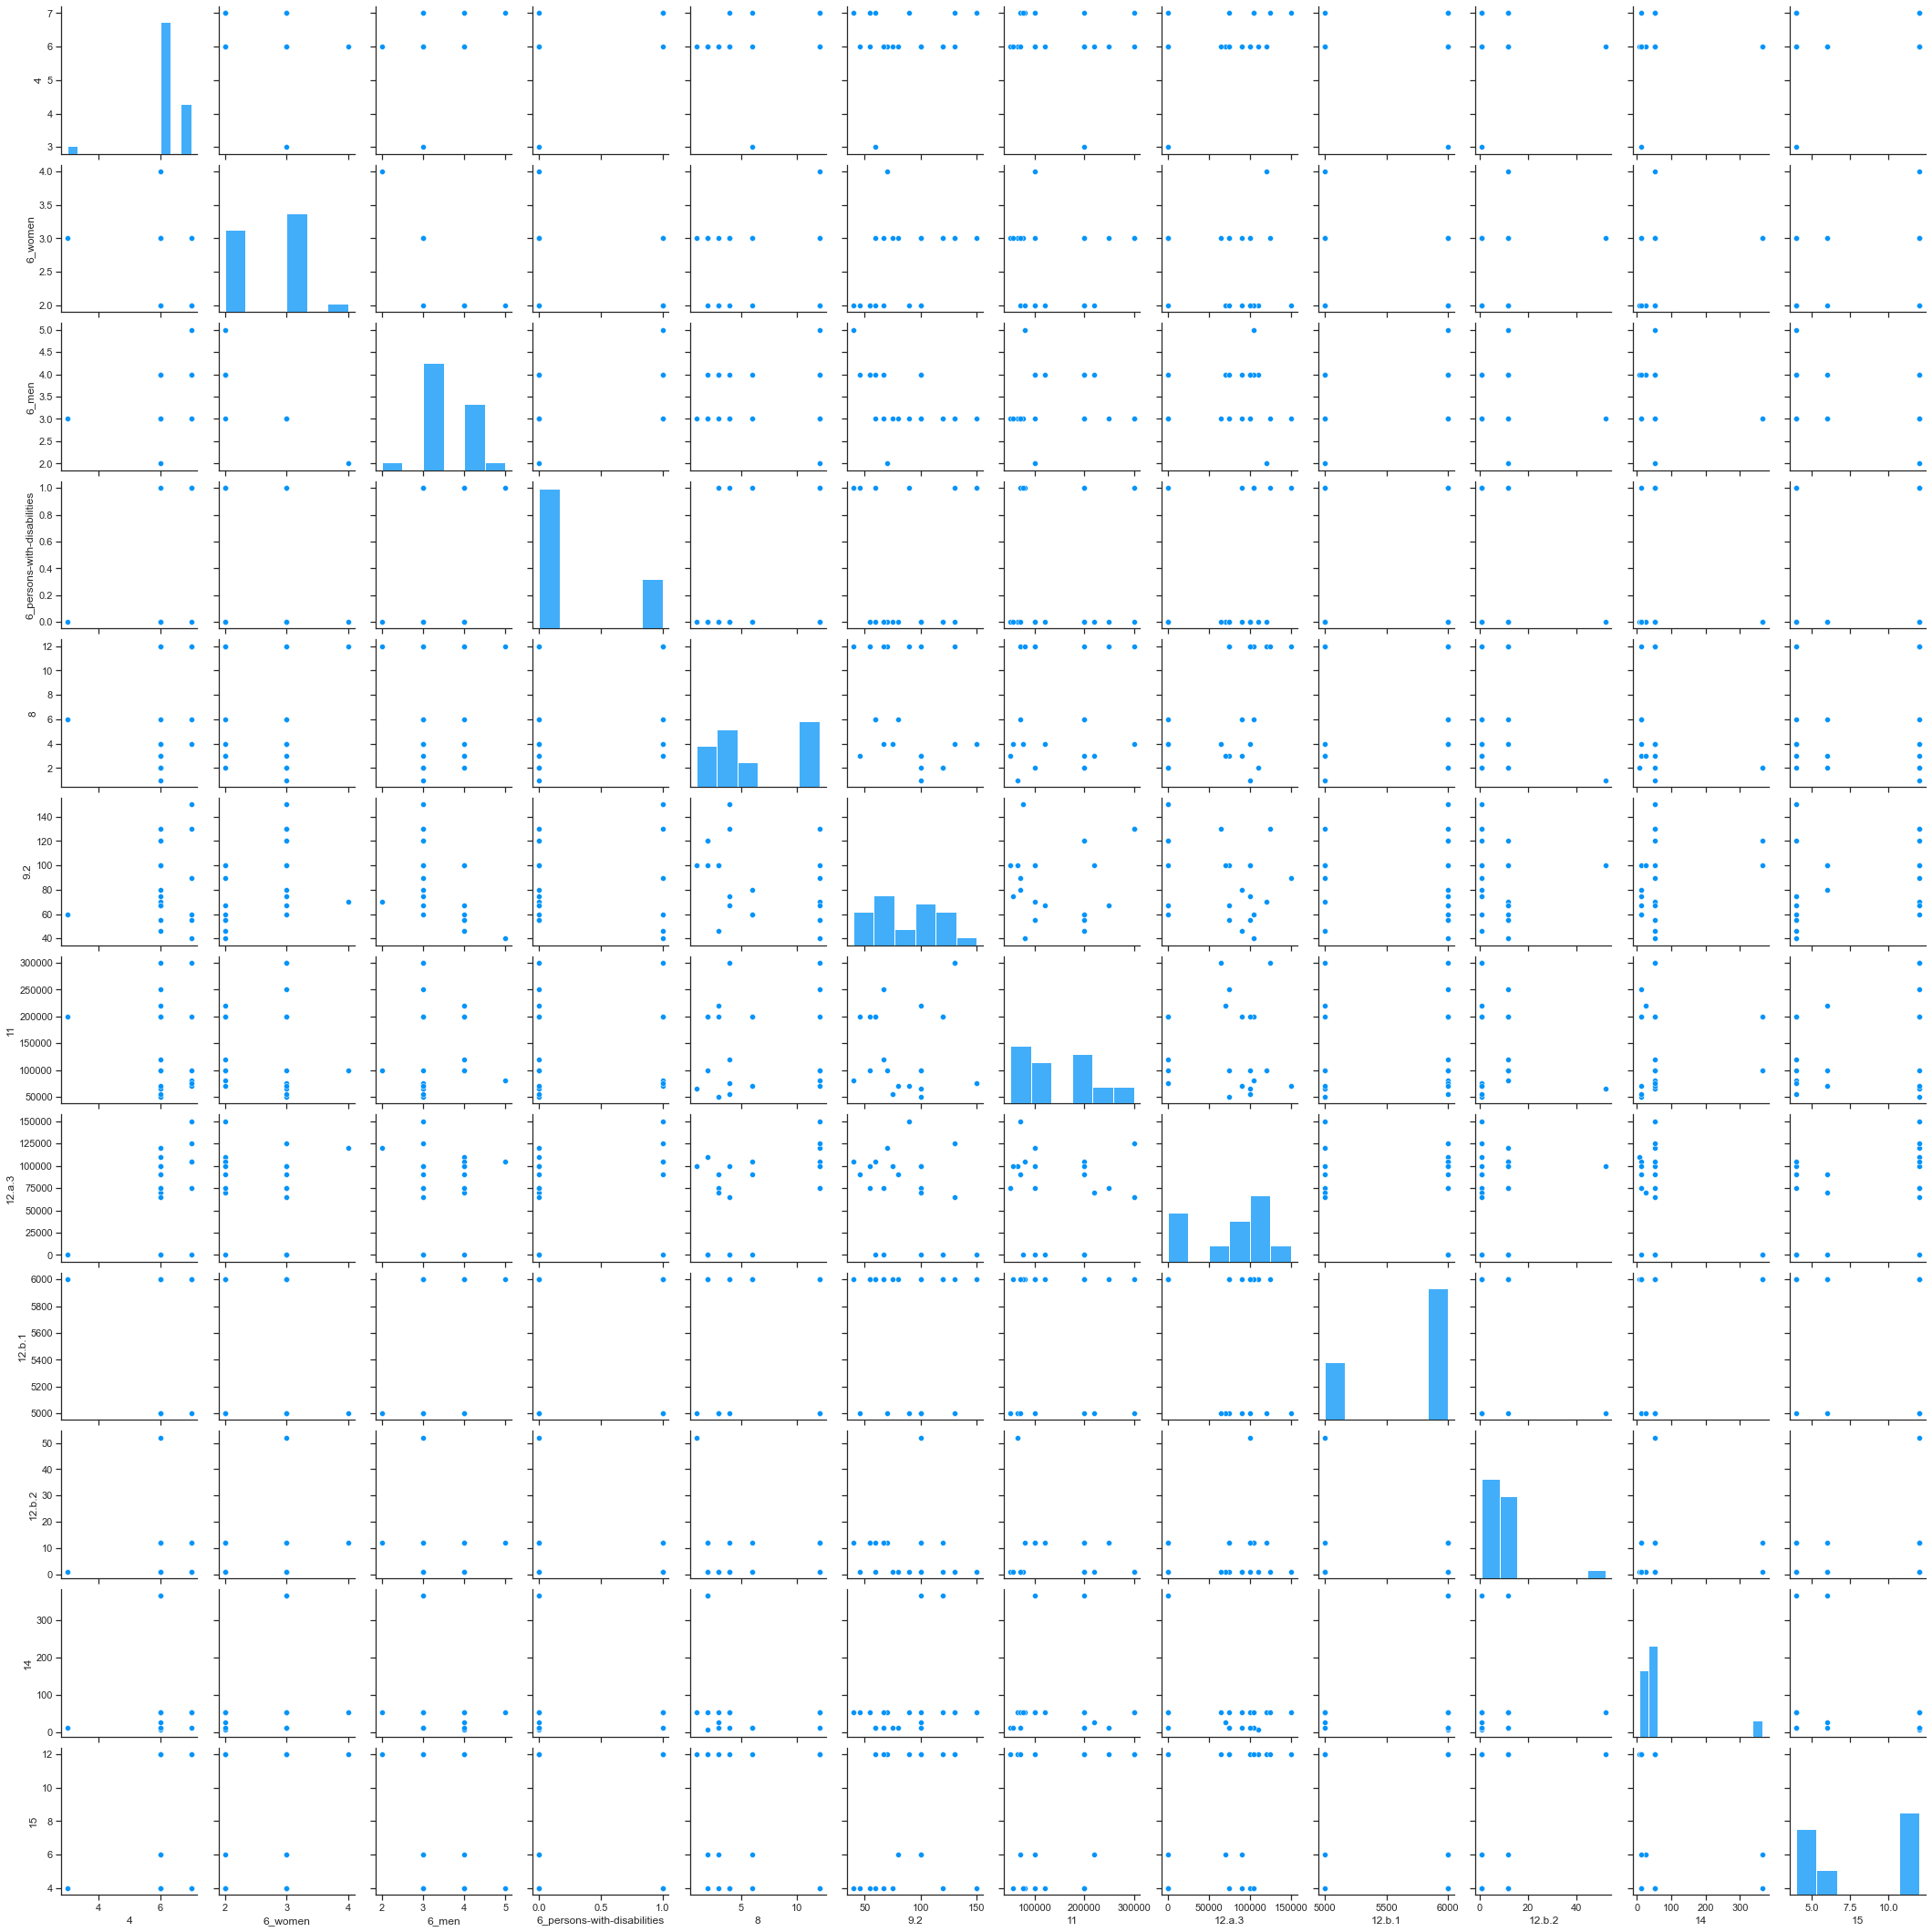

In [111]:
#Class Exercise(2)
#Visualization (part 1)
#Create a pairplot to visually examine the potential relationship between variables

#Pairplot Visualization
sns.pairplot(simple_df);

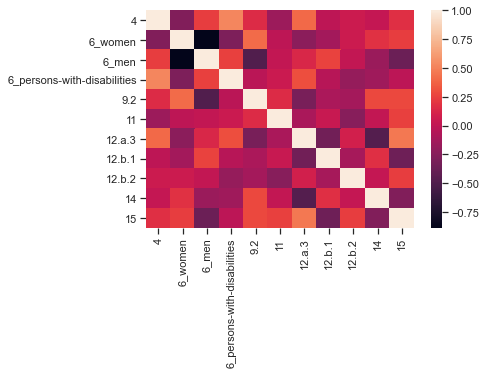

In [112]:
#Class Exercise(3)
#Visualization (part 2)
#Create a heatmap as a secondary method of visually examining the potential relationship between variables

#Heatmap Visualization
simple_corr = simple_df.corr(method='pearson')
sns.heatmap(simple_corr);

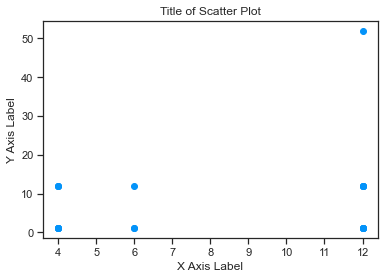

In [113]:
#Class Exercise(4)
#Linear Regression (part 1)
#Using linear regression analysis as the method to determine if there is a relationship
#We are not asking if there are differences in points, just determining if there exists trends
#Using Ordinary Least Squares because we are assuming homoscedasticity and no autocorrelation (all points independent with no delay)
#Would use Generalized Least Squares (GLS) should heteroscedasticity or autocorrelation be true

#Isolating the Data
isolated_df = data.copy() #create a copy of the wrangled DataFrame; rename isolated_df according to desired variables
isolated_df = isolated_df[[15, '12.b.2']] #choose the two variables that you wish to evaluate
isolated_df = isolated_df.dropna() #drop with missing values, as they cannot be evaluated
isolated_df = isolated_df.reset_index(drop=True) #reset the index after dropping values

isolated_df #check the DataFrame to verify chosen variables

#Creating x and Y variables
x_variable = isolated_df[15] #choose the column of your x-variable
y_variable = isolated_df['12.b.2'] #choose the column of your y-variable

#Scatter Plot
plt.scatter(x_variable, y_variable)
plt.title('Title of Scatter Plot')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label');

p-value: 0.0036819442290959843
Parameters: 15    0.899761
dtype: float64
R2: 0.3507859605649932
Standard errors: 15    0.273707
dtype: float64
Predicted values: [10.79713604 10.79713604  3.59904535 10.79713604 10.79713604  5.39856802
 10.79713604  3.59904535 10.79713604  3.59904535 10.79713604 10.79713604
 10.79713604  3.59904535  3.59904535  3.59904535  3.59904535  5.39856802
  5.39856802 10.79713604  3.59904535]
                                 OLS Regression Results                                
Dep. Variable:                 12.b.2   R-squared (uncentered):                   0.351
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              10.81
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                     0.00368
Time:                        14:26:37   Log-Likelihood:                         -80.029
No. Observations:                  21   AIC:          

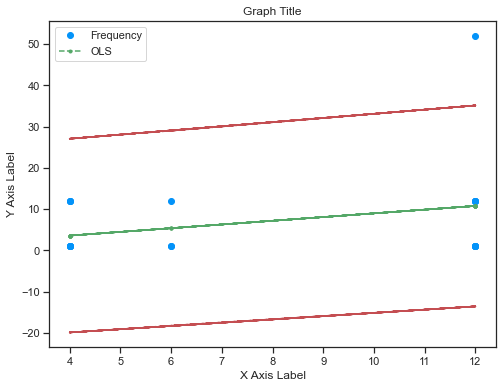

In [114]:
#Class Exercise(5)
#Linear Regression (part 2)

#Import Statistics Package
import statsmodels.api as sm

#Ordinary Least Squares Regression
isolated_ols = sm.OLS(y_variable, x_variable)
isolated_reg = isolated_ols.fit()

#Parameters for Evaluation of the fit
print('p-value:', isolated_reg.pvalues.loc[15]) #the p-values will use the length of the x-variable
print('Parameters:', isolated_reg.params)
print('R2:', isolated_reg.rsquared)
print('Standard errors:', isolated_reg.bse)
print('Predicted values:', isolated_reg.predict())
print(isolated_reg.summary())

#Visualizing the fit
#establishing the confidence intervals
isolated_pred = isolated_reg.get_prediction()
iv_l = isolated_pred.summary_frame()['obs_ci_lower'] #lower confidence interval line
iv_u = isolated_pred.summary_frame()['obs_ci_upper'] #upper confidence internal line
#plotting the results
fig, ax = plt.subplots(figsize=(8, 6)) #size of the graph
ax.plot(x_variable, y_variable, 'o', label='Frequency') #scatter plot of points
ax.plot(x_variable, isolated_reg.fittedvalues, 'g--.', label='OLS') #best fit line
ax.plot(x_variable, iv_u, 'r--') #upper ci
ax.plot(x_variable, iv_l, 'r--') #lower ci
ax.legend(loc='best') #legend location
ax.set_title('Graph Title')
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label');

##### End Class Exercise

## Varying Attempts for Wrangling, Visualizations, Statistics, etc.

In [ ]:
#Creating a bootstrapped sample set and doing further statistical evaluation
#This didn't actually make sense for my data because I'm not looking at differences, rather if relationships exist
#Expanding the dataset did not seem as if it would be representative of respondents
#Considering this is more of an analysis within social sciences, more qualitative analyses should be applied
#There still has to be consideration for and respect of individual ideas/boundaries

#Task 9 - O&M Monitoring (p9)
#14, 15 - Bootstrapped Stats - Frequency of Monitoring & Service
om_mon_mean = om_only[14].mean()
om_serv_mean = om_only[15].mean()
print('Monitoring Frequency Mean:', om_mon_mean)
print('Service Frequency Mean:', om_serv_mean)

#Isolate desired data
om_col = list(o_m.columns[26:28])
om_only = o_m[om_col]
om_only

#Convert to Array
om_14 = om_only[14].to_numpy()
om_15 = om_only[15].to_numpy()

#Function to create bootstrap sample
def bs_replicate_1d(data, func):
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size):
    bs_replicates = np.empty(size)
    
    for n in range(size):
        bs_replicates[n] = bs_replicate_1d(data, func)
    
    return(bs_replicates)

bs_om_14 = draw_bs_reps(om_14, np.mean, size=1000)
bs_om_14

In [ ]:
#Having a particularly difficult time figuring this out
#I think that I don't have data in a good enough format to actually analyze this
#I don't know how to do it and am generally really confused
#The text methods that I've tried to apply don't match the format that my data is in
#gonna try and move the data into a different format to see if that helps

In [ ]:
#Removing Stop Words

import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#stop = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

challenges_df['1 Clean'] = challenges_df['Challenge 1'].apply(lambda x: remove_stopwords(x))

challenges_df['1 Clean']

#This didn't work as anticipated

In [ ]:
#Counting in all the columns
challenge_col = ['Challenge 1', 'Challenge 2', 'Challenge 3', 'Challenge 4']

common_challenges = pd.DataFrame(columns = challenge_col)

for c in challenge_col:
    common_count = Counter(challenges_df[c]).most_common()
    common_challenges[c] = common_count

common_challenges

In [ ]:
#Trying to clean stopwords
#from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')


text_columns = ['Challenge 1', 'Challenge 2', 'Challenge 3', 'Challenge 4']

challenges_df['1 Clean'] = challenges_df['Challenge 1'].apply(lambda x: ' '.join([c for c in x.split() is not c in (stop)]))

challenges_df['1 Clean']

#for c in text_columns:
#    text_df[c] = text_df[c].apply(lambda x: ' '.join([word for word in x.split() is word not in (stop)]))

#text_df

In [ ]:
#Trying to count challenges
#challenge_col = ['Challenge 1', 'Challenge 2', 'Challenge 3', 'Challenge 4']

common_challenges = pd.DataFrame(columns = challenge_col)

for c in challenge_col:
    common_count = Counter(challenges_df[c]).most_common()
    common_challenges[c] = common_count

common_challenges

In [ ]:
#Text Pre-processing Attempts

#Task 1 - Remove punctuation
#Task 2 - Tokenization
#Task 3 - Remove stop words
#Task 4 - Stemming/Lemmatizing

data
text_df = data.copy()
text_df

import string
print(string.punctuation)

def remove_punc(txt):
    txt_nopunc = [c for c in txt if c not in string.punctuation]
    return txt_nopunc

text_df['17_clean'] = data[17].apply(lambda x: remove_punc(x))
text_df

In [ ]:
#Removing Stop Words - another attmept

import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#stop = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[40:70]

def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

text_df['18_clean'] = text_df[18].apply(lambda x: remove_stopwords(x))

text_df.head()

#text_columns = [1, 2, 3, 5, 7.2, '12.b.3', 16, 17, 18, 20.2, 21, 22, 23]

#for c in text_columns:
#    text_df[c] = text_df[c].apply(lambda x: ' '.join([word for word in x.split() is word not in (stop)]))

#text_df

In [ ]:
#Another version of removing stopwords

%pip install gensim
import gensim
from gensim.parsing.preprocessing import remove_stopwords

text_columns = [1, 2, 3, 5, 7.2, 16, 17, 18, 20.2, 21, 22, 23]
#'12.b.3'

#for c in text_columns:
#    text_df[c] = remove_stopwords(text_df[c])

#text_df


text_df[1] = remove_stopwords(text_df[1])
text_df